# EARTHQUAKE IMPACT PREDICTION-MODEL
Open in your favourite IDE and click the "Run" button to execute the code.
![](https://i.imgur.com/IEdSVPS.jpg)

The above scary picture belong to one of the most undesirable disaster happen ever in the history of Nepal, which is the [Nepal Earthquake](https://www.seattletimes.com/photo-video/photography/scenes-from-the-nepal-earthquake/) took place in the year 2015. The kind of damage that happens to mankind and the resources of the country is irreparable. As per [Article](https://nhess.copernicus.org/articles/19/873/2019/#:~:text=Despite%20the%20great%20loss%20of,million%20(USD%205.178%20billion).) the disaster has caused killing more than 8800 people and injuring more than 23 000. The epicenter was near Pokhara, 77 km northwest of the capital of Kathmandu, and the hypocenter was at a depth of 10–24 km. 

## Problem statements:
We are attempting to classifying the ordinal variable damage grade, which denotes the degree of earthquake-related damage to the building and the three levels of damage are below:
* represents low damage: damage caused `P` type earth-quake
* represents a medium amount of damage : Damaged cause by `L` type of earth-quake 
* represents almost complete/high destruction: damaged cause by earth-quake wave having high `amplitude` and longer `frequency`, which means longer magnitude and for longer duration.
### Evaluation criteria and loss function:
To measure the performance of our algorithms, we'll use the `F1` score which balances the precision and recall of a classifier. Traditionally, the [F1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) score is used to evaluate performance on a binary classifier:
![](https://i.imgur.com/gtQdkCH.png)

### Literature review of Earth-quake: 
Lets understand some basic term which is always associated with Earth-quake:
`How earth-quake happens:`
An earthquake occurs when two blocks of the earth's crust (tectonic plates) suddenly slip past one another. This movement releases a large amount of energy in the form of seismic waves, which can cause the ground to shake violently. The point where the two plates come together is called the fault line, and the movement along the fault is what causes the earthquake. The [animation](https://www.youtube.com/watch?v=RqqqSnaTfQo&ab_channel=Let%27stute) would show the tectonic plates slowly moving towards each other, building up tension, until they finally slip past one another and release the energy in the form of seismic waves, which causes the ground to shake.


Earthquakes can have different intensities, which are measured using the Richter magnitude scale and the Modified Mercalli Intensity (MMI) scale.

The Richter magnitude scale is a numerical measure of the energy released by an earthquake, with each whole number increase on the scale indicating a tenfold increase in the amplitude of the seismic waves. Earthquakes with magnitudes of 2.0 or less are considered to be minor, while those with magnitudes of 8.0 or higher are considered to be major.

The Modified Mercalli Intensity (MMI) scale, on the other hand, measures the perceived shaking intensity of an earthquake at a specific location. It ranges from I (not felt) to XII (total destruction).

It's important to note that these two scales measure different aspects of an earthquake: magnitude measures the amount of energy released and MMI measures the degree of shaking.





In this notebook we will explore Supervised Machine Learning methods. Classification models such as logistic regression, decision tree and ensemble models such as RandomForest, XGBoost, LightGBM will trained to predict nature of damage for the given house id. We will use Pandas, Numpy, Matplotlib, Seaborn and Plotly to perform exploratory data analysis and gather insights for machine learning. We will do the following

* Install and Import libraries
* Explore the dataset and merge different files as required
* Translate the business problem to a machine learning problem
* EDA - exploratory data analysis
* Feature Engineering
* Data preparation - Train Val Split, Encoding, Imputing and Scaling
* Select input features
* Define evaluation metrics
* Define baseline model
* Select best model without hyperparameter tuning
* Hyperparameter tuning for select models
* Make predictions
* Save the best model
* Summarise insights and learning

## Installing & importing libraries:

In [ ]:
%%time
!pip install pandas jovian Boruta numpy scikit-learn opendatasets seaborn matplotlib plotly pydrive  --quiet

CPU times: user 26.4 ms, sys: 16.7 ms, total: 43.1 ms
Wall time: 4.95 s


## Importing necessary library

In [ ]:
# OS and Data libraries
import os
import opendatasets as od
from zipfile import ZipFile

#Data analysis libraries
import numpy as np
import pandas as pd

#Visualisation libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
#date formatters
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

#calling subplots from plotly
from plotly.subplots import make_subplots
from plotly.offline import plot
from plotly.subplots import make_subplots
from IPython.display import Latex

#Jupyter notebook visualisation font and figure display parameters
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Ignore warning 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
os.listdir()

['.config',
 'train_labels.csv',
 'test_values.csv',
 'train_values.csv',
 'sample_data']

## Importing the different dataset:

In [ ]:
%%time
df_train_label=pd.read_csv('train_labels.csv',index_col=False)
df_test_values=pd.read_csv('test_values.csv')
df_train_values=pd.read_csv('train_values.csv')

CPU times: user 751 ms, sys: 313 ms, total: 1.06 s
Wall time: 1.07 s


In [ ]:
df_train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [ ]:
df_train_label.shape,df_test_values.shape,df_train_values.shape

((260601, 2), (86868, 39), (260601, 39))

In [ ]:
df_train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train_label.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


## Preparing final dataset:
Dataset here has given in different files, having some common columns.Hence it required to merge the file into one .csv which can be used for making different version ML model.

So here the two different dataframe name `df_train_label` & `df_train_values` have one common column `building_id`, so we are merging (using `pd.merge`) the two different dataframe on this common column.

In [ ]:
%%time
merged_df=df_train_values.merge(df_train_label,on='building_id')
merged_df.sample(100)

CPU times: user 181 ms, sys: 29.6 ms, total: 211 ms
Wall time: 212 ms


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
20909,949097,4,1334,9215,3,15,19,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,0,1,0,0,0,0,0,0,0,0,2
173495,175198,6,516,8770,2,0,2,4,t,r,n,f,q,s,d,1,0,0,0,0,0,0,0,0,0,0,v,0,1,1,0,0,0,0,0,0,0,0,0,2
58295,1030345,4,514,8137,2,0,3,7,t,u,n,v,x,s,d,0,0,0,1,0,0,0,0,0,0,0,v,1,1,0,1,0,0,0,0,0,0,0,0,2
115885,233396,27,548,4430,4,125,4,8,t,r,n,f,x,o,d,1,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
217484,505611,23,928,782,2,35,7,4,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
201919,467717,21,581,8549,3,20,7,7,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
105599,792046,20,158,2452,2,0,12,7,t,i,x,v,s,s,d,0,0,0,0,0,0,0,0,1,0,0,v,3,1,0,1,0,0,0,0,0,0,0,0,1
210604,732247,6,673,6023,1,0,11,3,t,h,n,v,j,s,d,0,0,0,0,0,0,0,0,0,0,1,v,1,0,0,0,0,0,0,0,0,0,0,0,1
152962,551736,22,1366,8899,2,20,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
11215,163379,6,697,35,2,0,4,5,n,w,n,f,q,s,d,0,0,0,0,0,0,1,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,2


In [ ]:
df=merged_df.copy()
# Making copy of the merged dataframe 

## Exploring dataset:
After merging dataset is being explored, which is being used for checking any leakage of data while performing merging operation. 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [ ]:
row,column=df.shape
row,column

(260601, 40)

In [ ]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# displaying all the required columns
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
df.damage_grade

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

### Exploring features of dataset:
This dataset has 39 columns, with the building id column serving as a distinctive and random identification. The section below provides descriptions of the remaining 38 features. Random lowercase ascii letters have been used to obscure categorical variables. The same character appearing in several columns does not necessarily indicate the same original value.
* `geo_level_1_id, geo_level_2_id, geo_level_3_id` (type: int): Geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
* `count_floors_pre_eq `(type: int): number of floors in the building before the earthquake.
* `age` (type: int): age of the building in years
* `area_percentage` (type: int): normalized area of the building footprint
* `height_percentage` (type: int): normalized height of the building footprint.
* `land_surface_condition` (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
* `foundation_type` (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
* `roof_type` (type: categorical): type of roof used while building. Possible values: n, q, x.
* `ground_floor_type` (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
* `other_floor_type` (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
* `position` (type: categorical): position of the building. Possible values: j, o, s, t.
* `plan_configuration` (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
* `has_superstructure_adobe_mud` (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
* `has_superstructure_mud_mortar_stone` (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
* `has_superstructure_stone_flag` (type: binary): flag variable that indicates if the superstructure was made of Stone.
* `has_superstructure_cement_mortar_stone` (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
* `has_superstructure_mud_mortar_brick` (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* `has_superstructure_cement_mortar_brick` (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
* `has_superstructure_timber` (type: binary): flag variable that indicates if the superstructure was made of Timber.
* `has_superstructure_bamboo` (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
* `has_superstructure_rc_non_engineered` (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
* `has_superstructure_rc_engineered` (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
* `has_superstructure_other` (type: binary): flag variable that indicates if the superstructure was made of any other material.






## Exploratory data analysis:
 The above dataset is very rich in-terms of number of columns, which is capturing the several of factor on which condition or house depends. On performing the EDA would facilitate in terms of opening the hidden information present in dataset, which could be used for making ML model.
 Column named `damage_grade` contains the value range from 1 to 3, which is representing the depth or level of damage caused by earthquake, so order is being associated to this columns hence ordinal values.

Since this analysis has been centered around classification of grade of earth-quake, most of the EDA will also be performed by keeping damage-grade as desired output

### Open Ended Question:
Before making correlation of one columns with another columns, lets extract information which could be used for reaching to some conclusion

### Q1. Finding counts for each damage grade.

In [ ]:
damage_dict=df.damage_grade.value_counts().to_dict()
fig = px.pie(df.damage_grade.value_counts()
, values=list(damage_dict.values()), names= list(damage_dict.keys()), color= list(damage_dict.keys()),
            
           # color_discrete_map={'Damage_grade_1':'lightcyan',
            #                     'Damage_grade_2':'cyan',
           #                      'Damage_grade_3':'royalblue'
            #                     },
            hole=.4,
            title='<b>Proportion of different damage grade:</b>',
            template = "none"
            )
fig.show()

#### Q2. For each damage grade what's the count of number of floor house contains ?

In [ ]:
# Segrigating dataframe for each damage grade
df_damage_1=df[df['damage_grade']==1]
df_damage_2=df[df['damage_grade']==2]
df_damage_3=df[df['damage_grade']==3]

Here instead of creating different dataframe corresponding to each damage grade, it can also be possible to create the multi-index dataframe where index will be respective damage grade.

Now `multi-index` Dataframe is another version of `groupby` clause, and here group by is being performed on `Damage-grade` of merged dataframe and then taking counts, which will give the statistics for each columns.

In [ ]:
df_groupby=df.groupby(['damage_grade']).count()

In [ ]:
df_trail=df.groupby(['damage_grade'])

In [ ]:
df_groupby

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
damage_grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124
2,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259
3,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218


In [ ]:
fig=px.bar(df_groupby.count_floors_pre_eq,barmode='group')
fig.update_layout(
    title="<b>Floor counts in house for each damage grade</b>",
    xaxis_title="Different damage grade",
    yaxis_title="Counts of floor for each damage grade:",
    font=dict(family='Arial',
             size=14,
             )
)
fig.show()

The xaxis of the graphs show different category of earth damage which follow particular order.
Maximum number of house floor which got affected from different earth-quake grade is of 2nd grade of earth-quake, followed by 3rd type of damage grade and least number of house got effected by 1st damage grade of earthquake.

### Q3. Whats the house area % for each damage grade ?

In [ ]:
df_damage_1_area_dict=df_damage_1.area_percentage.value_counts().nlargest(5).to_dict()
fig = px.pie(df_damage_1.area_percentage.value_counts()
, values=list(df_damage_1_area_dict.values()), 
             
             names= list(df_damage_1_area_dict.keys()), 
             
             #color= list(damage_2_floor_dict.keys()),
            
           # color_discrete_map={'Damage_grade_1':'lightcyan',
            #                     'Damage_grade_2':'cyan',
           #                      'Damage_grade_3':'royalblue'
            #                     },
            hole=.4,
            title='<b>% of Area for Damage grade 1:</b>',
            template = "none",
            
            )

fig.show()

In [ ]:
df_damage_2_area_dict=df_damage_2.area_percentage.value_counts().nlargest(5).to_dict()
fig = px.pie(df_damage_2.area_percentage.value_counts()
, values=list(df_damage_2_area_dict.values()), 
             
             names= list(df_damage_2_area_dict.keys()), 
             
             #color= list(damage_2_floor_dict.keys()),
            
           # color_discrete_map={'Damage_grade_1':'lightcyan',
            #                     'Damage_grade_2':'cyan',
           #                      'Damage_grade_3':'royalblue'
            #                     },
            hole=.4,
            title='<b>% of Area for Damage grade 2:</b>',
            template = "none",
            
            )
fig.show()

In [ ]:
df_damage_3_area_dict=df_damage_3.area_percentage.value_counts().nlargest(5).to_dict()
fig = px.pie(df_damage_3.area_percentage.value_counts()
, values=list(df_damage_3_area_dict.values()), 
             
             names= list(df_damage_3_area_dict.keys()), 
             
             #color= list(damage_2_floor_dict.keys()),
            
           # color_discrete_map={'Damage_grade_1':'lightcyan',
            #                     'Damage_grade_2':'cyan',
           #                      'Damage_grade_3':'royalblue'
            #                     },
            hole=.4,
            title='<b>% of Area for Damage grade 3:</b>',
            template = "none",
            
            )
fig.show()

The above graphs show is being used to infer how's building built area distribution has been affected by the different earthquake damage grade.

### Q4. Structure has made up of mud or not ?

In [ ]:
%%time
df_mud=df.has_superstructure_adobe_mud.value_counts().to_dict()
fig = px.pie(df.has_superstructure_adobe_mud.value_counts()
, values=list(df_mud.values()), 
             
             names= list(df_mud.keys()), 
             
             #color= list(damage_2_floor_dict.keys()),
            
           # color_discrete_map={'Damage_grade_1':'lightcyan',
            #                     'Damage_grade_2':'cyan',
           #                      'Damage_grade_3':'royalblue'
            #                     },
            hole=.4,
            title='<b>Count of mud house:</b>',
            template = "none",
            
            )
fig.show()

CPU times: user 22.8 ms, sys: 1.97 ms, total: 24.8 ms
Wall time: 29.2 ms


The above plots has been made to get count of no. of property which is built up of mud or not. Among all the listed property `8.86%` is built up of mud and `91.1%` are built of another material.

### Q5. Age of the property for respective damage grade?

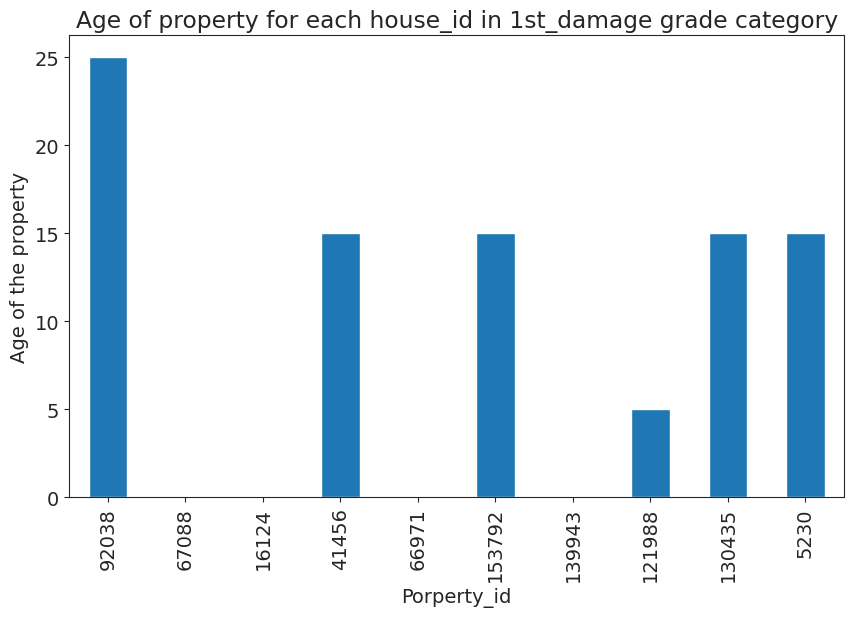

In [ ]:
df_damage_1.age.sample(10).plot(kind='bar')
plt.xlabel("Porperty_id")
plt.ylabel("Age of the property")
plt.title('Age of property for each house_id in 1st_damage grade category')
plt.show()

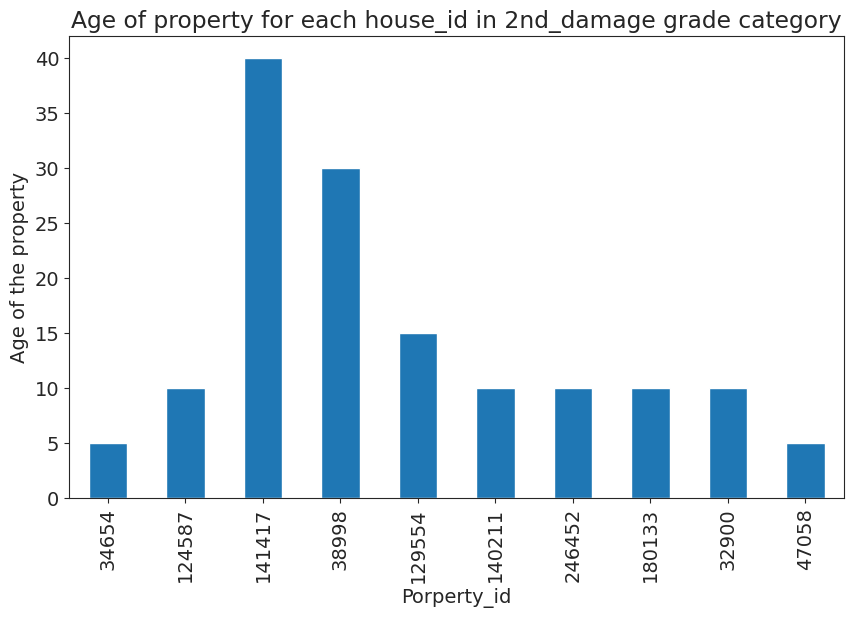

In [ ]:
df_damage_2.age.sample(10).plot(kind='bar')
plt.xlabel("Porperty_id")
plt.ylabel("Age of the property")
plt.title('Age of property for each house_id in 2nd_damage grade category')
plt.show()

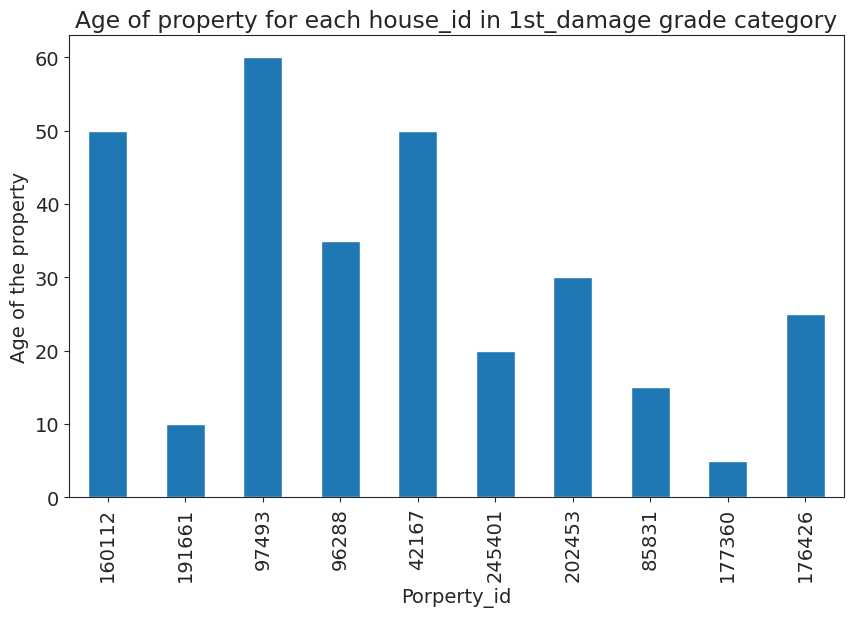

In [ ]:
df_damage_3.age.sample(10).plot(kind='bar')
plt.xlabel("Porperty_id")
plt.ylabel("Age of the property")
plt.title('Age of property for each house_id in 1st_damage grade category')
plt.show()

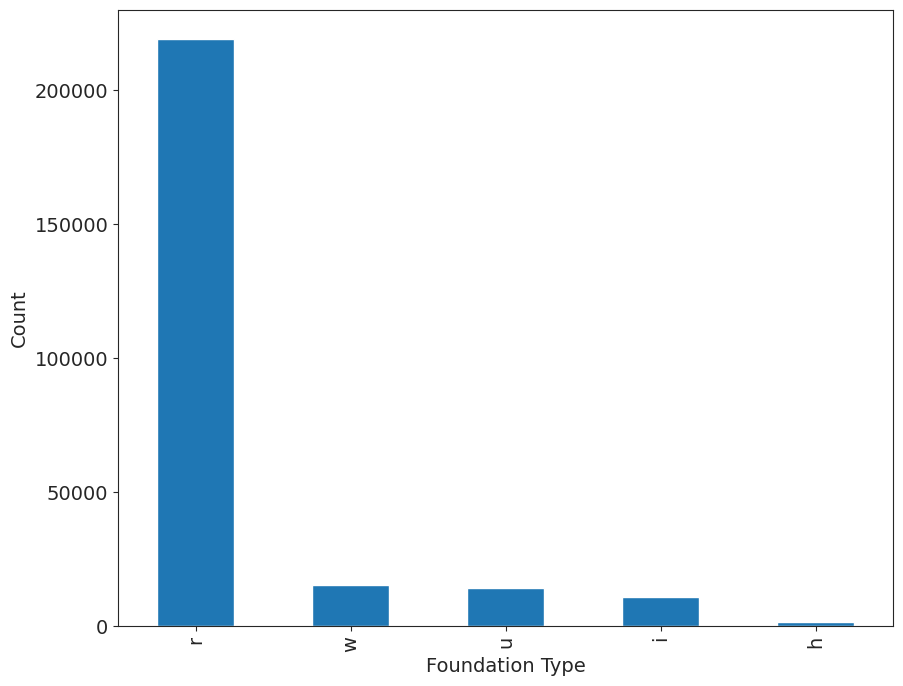

In [ ]:
df.foundation_type.sort_values().value_counts().plot.bar(figsize=(10, 8));
plt.xlabel('Foundation Type')
plt.ylabel('Count')
plt.title('Count of foundation type of building')
plt.show()

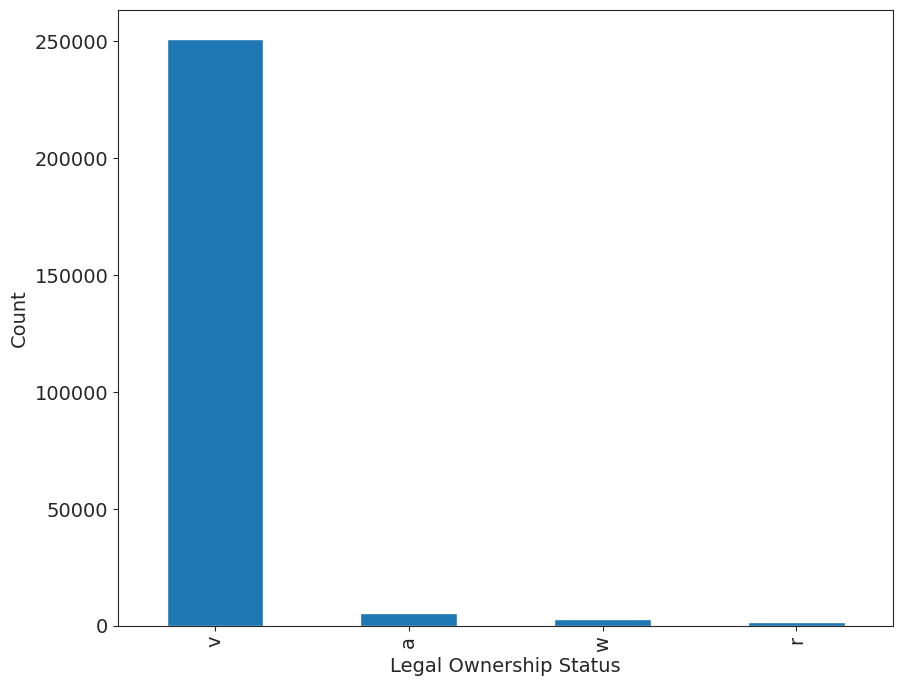

In [ ]:
df.legal_ownership_status.value_counts().plot.bar(figsize=(10, 8))
plt.xlabel('Legal Ownership Status')
plt.ylabel('Count')
plt.title('Count of different owner_ship of house')
plt.show()

In [ ]:
#df_GB.count_families.value_counts().plot.bar(figsize=(10,5))

### Q6. Count of property faced earth_quake used apart from domestic purposes? 


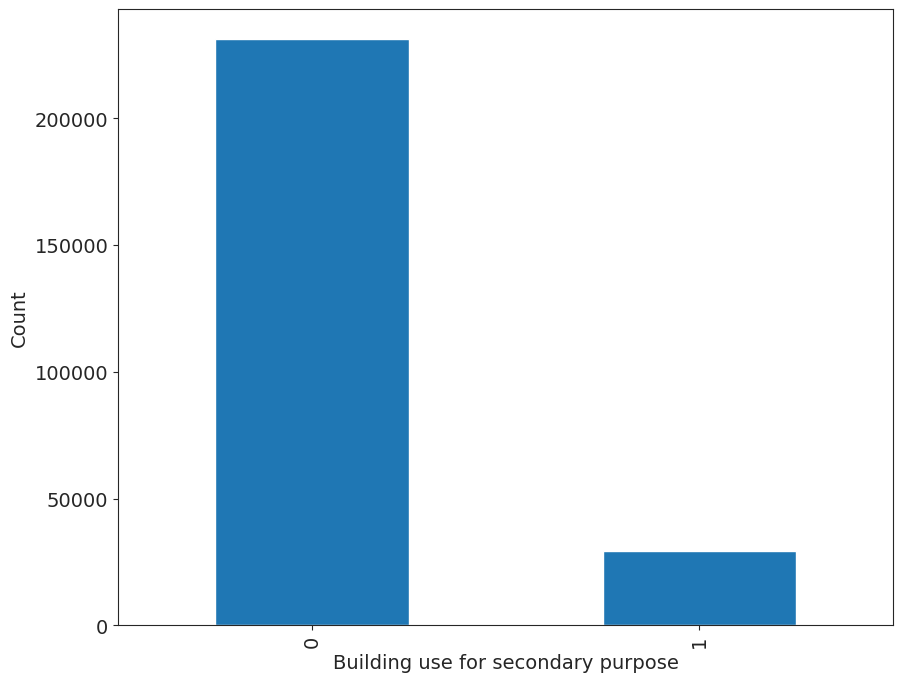

In [ ]:
df.has_secondary_use.value_counts().plot.bar(figsize=(10, 8))
plt.xlabel('Building use for secondary purpose')
plt.ylabel('Count')
plt.title('Count of building usages type')
plt.show()

Approximately 10000 property has been used as hotel and 250000 number of property hasn't been used for hotel.

### Q7. Among all the property which has faced earthquake damage has been used for commercial purpose like hotel or not ?

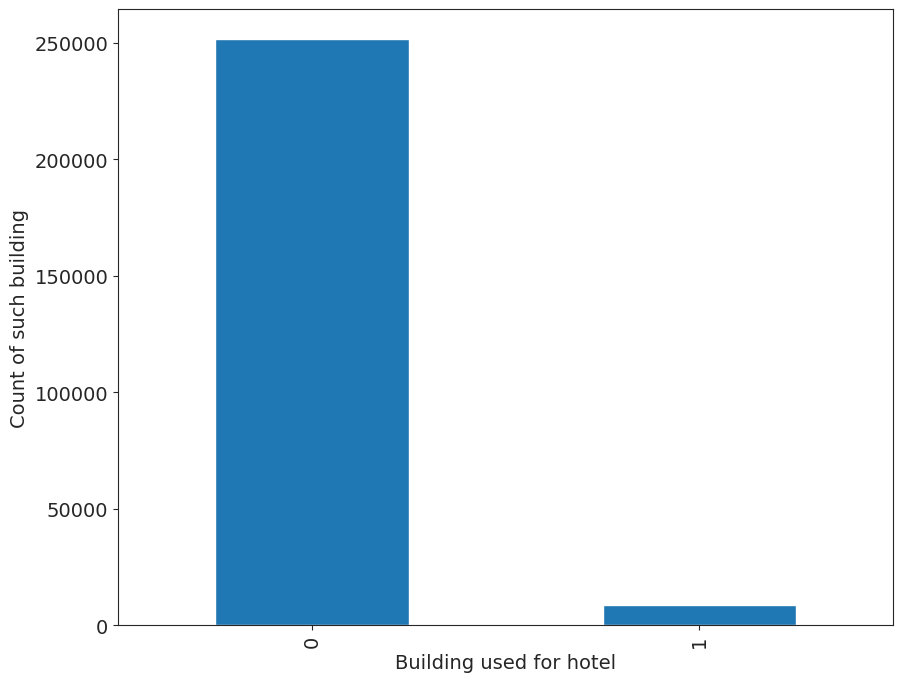

In [ ]:
df.has_secondary_use_hotel.value_counts().plot.bar(figsize=(10,8))
plt.xlabel("Building used for hotel")
plt.ylabel("Count of such building")
plt.title('Count of different type of hotel usage')
plt.show()

Majority of property which has faced any kind of earth_quake damage, hasn't been used for commercial purpose like hotels.Number of property which has faced earth_quake_damage and used for commerical purpose is 10000.

### Q8. What's the count of those property which has faced earth_quake_damage and used as goverment offices ?

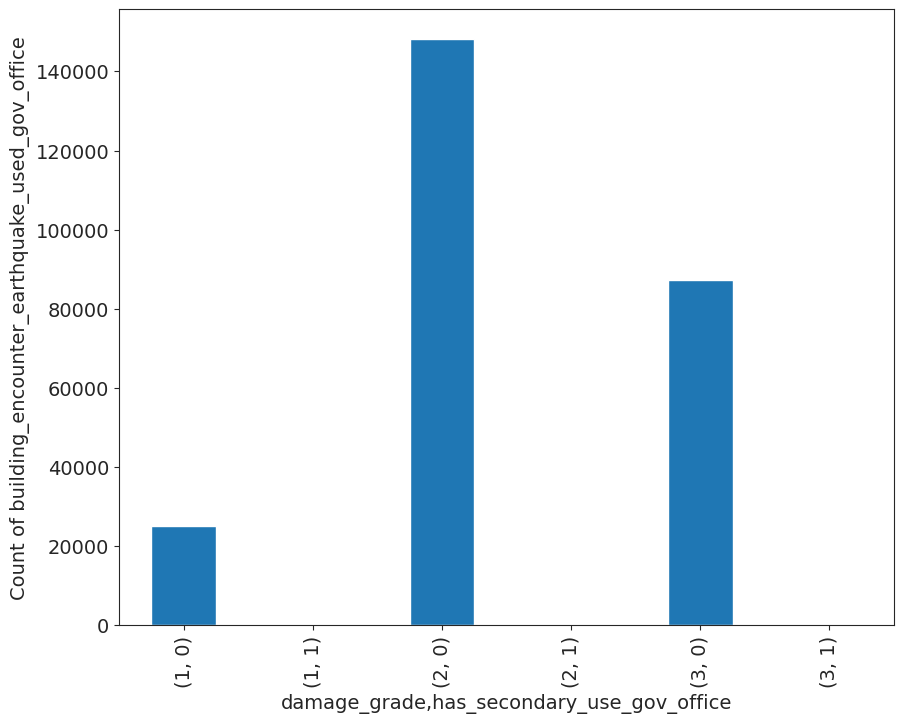

In [ ]:
df_GB=df.groupby(['damage_grade'])
df_GB.has_secondary_use_gov_office.value_counts().plot.bar(figsize=(10,8))
plt.ylabel("Count of building_used_gov_office")
plt.title('Count of goverment_building_effected by earth_quake')
plt.show()

The above graphs is representing for each damage grade has building used as `goverment_offices`, which is represented as `0` means no & `1` means Yes. So x-axis `(1,0)` represent for the damage_grade_1, represented as 1, 0 means not used as goverment_offices, and y-axis gives the count of such property.

Based on above analogy we can extract below information:

* So we can infer from this graphs that count of property having face damage_grade_1 and not used for goverment offices is 22000 
* The count of property having face damage_grade_1 and used for goverment offices is negligible
* Property which has faced damage_grade_2 and not used as goverment offices counts >140000
* Property which has faced damage_grade_2 and used as goverment offices counts negligible.
* Property which has faced damage_grade_3 and used as goverment offices counts negligible
* Property which has faced damage_grade_2 and not used as goverment offices counts as 90000. 

Now from above information we can make following conclusion 
* All the property which has faced any kind of damage haven't been used as goverment offices 
* The count of property which has been used as goverment offices, having face any kind of earth-quake damage is having negligible number or those property hasn't face any damage.


In [ ]:
#grouped = df.groupby('group_column')  # replace 'group_column' with the name of the column you want to group by
for group_key in df_GB.groups.keys():
    group_df = df_GB.get_group(group_key)
    print(group_df.columns)

### Q9. Whats the type of roof of each of the building faced earthquake damage grade?

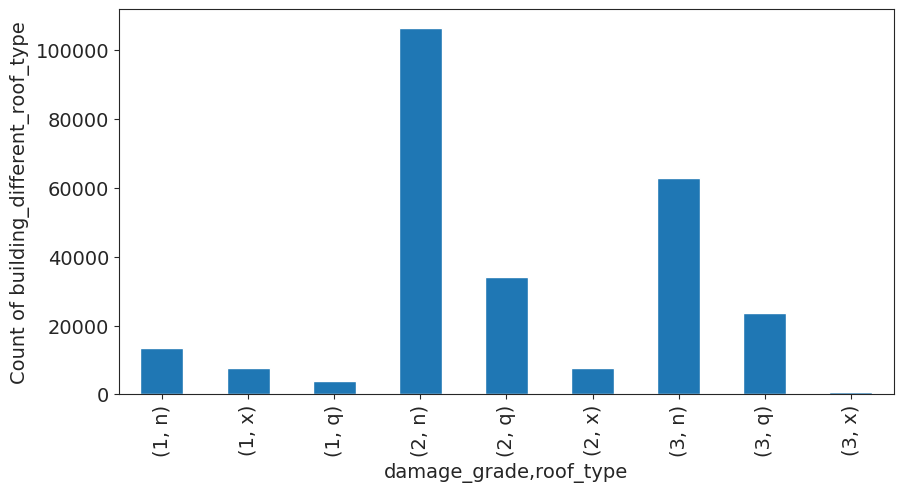

In [ ]:
df_GB.roof_type.value_counts().plot.bar(figsize=(10,5))
plt.ylabel('Count of building_different_roof_type')
plt.title('Count of building having different roof type')
plt.show()

On refering the above figure we can say that total 4 types of roof is present which are `n`,`x`,`q`. 
* For **damage_grade_1** `n` type roof is having maximum counts which is ~16000, followed by `x` type roof which count for 8000 and least count which is hold for 5000 for `q` type roof.
* For **damage_grade_2** `n` type of roof which count for 120000, count of `q` type of roof hold for ~30000 and least count is for `x` type roof 
* And for **damage_grade_3** `n` type floor is having maximum count , followed by `q` type which count for ~18000, and least or negligiable counts hold for `x` type of roof.

Based on the above analogy we can conclude that:
* Maximum damage has occured to the building which is having `n` type of roof 
* Building having `q` type roof has occurs less effected 
* Among all building, those having `x` type roof has got negligible effect by earth quake damage in each grade.

### Q10. How many floor do these building have which has face the earth_quake_damage ?

'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition'

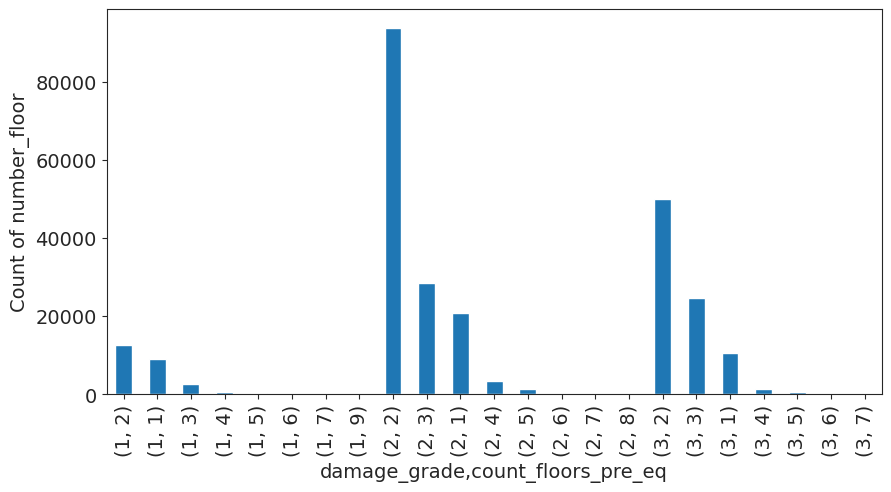

In [ ]:
df_GB.count_floors_pre_eq.value_counts().plot.bar(figsize=(10,5))
plt.ylabel("Count of number_floor")
plt.title("Count of floor for each damage grade")
plt.show()

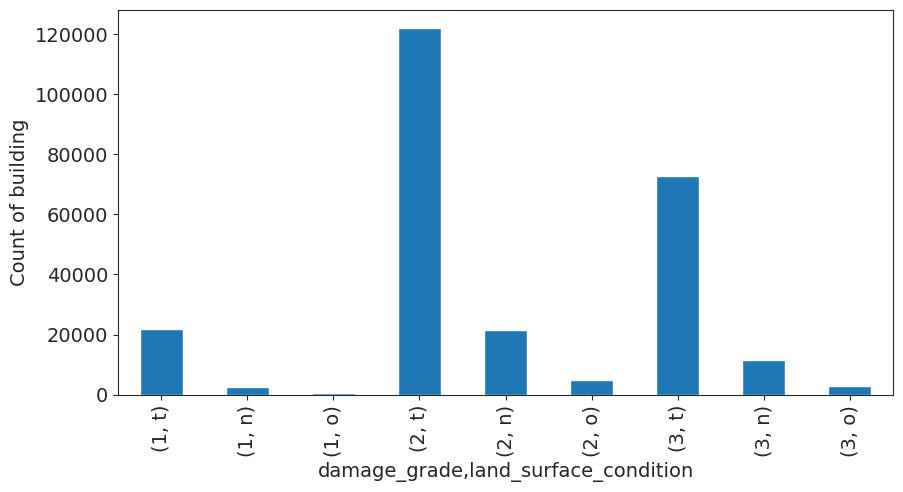

In [ ]:
df_GB.land_surface_condition.value_counts().plot.bar(figsize=(10,5))
plt.ylabel("Count of building")
plt.title("Count of different land surface condition for each damage grade")
plt.show()

### Identification of input, target columns of dataframe:

Among the different columns of dataframe, we have to identified which columns goes as input for makind model or which columns is our desired i.e target columns of the dataframe.
* `input_cols`: Will list out name of columns which act as regressor for the model.
* `target_col`: Column which is desired output of the model.
* `input_df`: dataframe which gots eliminated based on the input columns.
* `target_df`: dataframe or dataseries which is desired output/outcome of the model


In [ ]:
input_cols, target_col = df.columns[4:-1], df.columns[-1]
inputs_df, targets_df = df[input_cols].copy(), df[target_col].copy()

In [50]:
df[input_cols].columns==df_test_values[input_cols].columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [44]:
len(inputs_df.columns),len(df_test_values.columns)

(73, 35)

`df.foundation_type`:Below columns will give counts of different type of foundation used for making house.

From the above plots it is confered that maximum number of property foundation belong to `r` category , followed by `w`,`u`,`i` and least count is followed by `h` type property .

In [ ]:
df_groupby

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
damage_grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124
2,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259
3,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218


### Identify numeric and categorical columns: 
We know that any machine learning model we make, that won't work if we give any kind of `text` as input, so we should segregate `numerical` and `categorical` columns based on the `datatype`
* `numeric_cols`: Columns belonging to dataframe whose datatype is of `numeric` or `float` in nature.
* `categorical_cols`: Columns belonging to dataframe whose datatype is of `text` or `word` or `alphabets` in nature.

In [ ]:
numeric_cols = df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = df[input_cols].select_dtypes(include='object').columns.tolist()

### Data preprocessing( imputation and Scaling):
After segrigating the `numeric` & `categorical` columns from the dataframe, we know that since there could be large range of value for the `numeric_col`. So to bring down all the range of value, and make it comparable against each other we will be performing `imputation` , which happens by giving strategy in `SimpleImputer` module of sklearn library from Python ecosystem. 

In [ ]:
%%time
# Impute and scale numeric columns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
imputer = SimpleImputer(strategy='mean').fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

CPU times: user 726 ms, sys: 212 ms, total: 937 ms
Wall time: 1.26 s


### Encoding of categorical columns of dataframe:
Similarly for the `categorical_column` of dataframe we need to convert `object` datatype to numeric which is done by different encoding technqiue like OneHotEncoder etc.

And set of these above steps combine together called as `Data preprocessing` technique

In [ ]:
%%time
# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

CPU times: user 731 ms, sys: 152 ms, total: 883 ms
Wall time: 885 ms


The given code uses the OneHotEncoder function from the sklearn.preprocessing module to encode categorical columns in a DataFrame.

* The `OneHotEncoder` function is used to encode categorical values into numerical values, which can be used for machine learning algorithms.
* `sparse=False` specifies that the encoded output should be in dense format instead of sparse format. This means that all the encoded values are stored instead of just the non-zero values.
* `handle_unknown`='ignore' specifies that if unknown categorical values are encountered during encoding, they should be ignored instead of raising an error.
* The .fit method is called on the OneHotEncoder object with the categorical columns of a DataFrame passed as the input.
The fit method fits the encoder on the input data, which calculates the encoding scheme used for converting categorical values to numerical values.

### Spliting of dataset:
Overfitting is a problem that arises frequently during model training. When a model performs exceptionally well on the data we used to train it, but fails to generalise well to new, unexplored data points, this phenomena happens. This may occur for a variety of reasons, including data noise or the model learning to predict particular inputs rather than the predictive factors that may help it make accurate predictions. Usually, a model's likelihood of being overfitted increases with model complexity.

Assigning two-thirds of the data points to the training set and the remaining one-third to the testing set is the simplest way to divide the dataset for modelling into training and testing sets. As a result, we first apply the model to the test set after training the model using the training set. We can assess the effectiveness of our model in this way. For instance, it is a solid indication that the model is overfitted if the training accuracy is very high and the testing accuracy is low.

In [61]:
# Create training and validation sets
from sklearn.model_selection import train_test_split
# Split dataset into train and test sets
train_inputs, test_inputs, train_targets, test_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets_df, test_size=0.2, random_state=42)
# Split the training set into train and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    train_inputs, train_targets, test_size=0.1, random_state=42)

In [ ]:
val_inputs.shape,train_inputs.shape

((26061, 65), (234540, 65))

## Base line model: Logisitc regression 
Since the problem statement says its classification problem. The base model here has been choosen as logistitc regression, on looking the performance in the form of acquaracy or score. For better in depth understanding of we can [Refer](https://medium.com/jovianml/mathematical-modeling-of-logistic-regression-f134efee6b23) , which could give the better understanding of its internal working .

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=42,solver='liblinear').fit(train_inputs,train_targets)

In [ ]:
model

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
print(model.intercept_)

[-0.1987122   0.09740171 -0.84215081]


train_inputs, val_inputs, train_targets, val_targets

In [ ]:
train_preds= model.predict(train_inputs)

`train_preds` will predict for the `train_inputs` which has been prepared before as datapreprocessing.

In [ ]:
train_probs = model.predict_proba(train_inputs)

In [ ]:
train_probs

array([[0.08318036, 0.48981993, 0.42699971],
       [0.07849486, 0.50881529, 0.41268985],
       [0.01945264, 0.66956261, 0.31098475],
       ...,
       [0.02222698, 0.62078977, 0.35698325],
       [0.02057611, 0.50100807, 0.47841582],
       [0.0462103 , 0.59536299, 0.35842672]])

After predicting the output from `logistic regression` model for the training input data, we need to check the accuracy of the output. 

In [65]:
from sklearn.metrics import confusion_matrix,f1_score,mean_squared_error,accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds) 

0.5879039822631534

Comparision based on `train_targets` which is target from training data and `train_preds` which is prediction from prepared model based on training data , accuracy the model performing is 58.886%

In [ ]:

train_confusion_matrix=confusion_matrix(train_targets, train_preds)
print(train_confusion_matrix)

[[  5664  16571    343]
 [  3659 120784   9023]
 [   280  66777  11439]]


For `classification` problem ,one of the parameter on which performance of the model depend on number of `True ` and `False` prediction .And this concisely is being given in matrix form as `confusion_matrix`.

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Now the above cell has given [confusion_matrix](https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,malignant%20tissue%20is%20considered%20cancerous.) It is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

Creating helper_function `predict_and_plot` in which we give the input and target variable to the function and get the desired accuracy as well as `confusion_matrix`

Accuracy: 58.79%


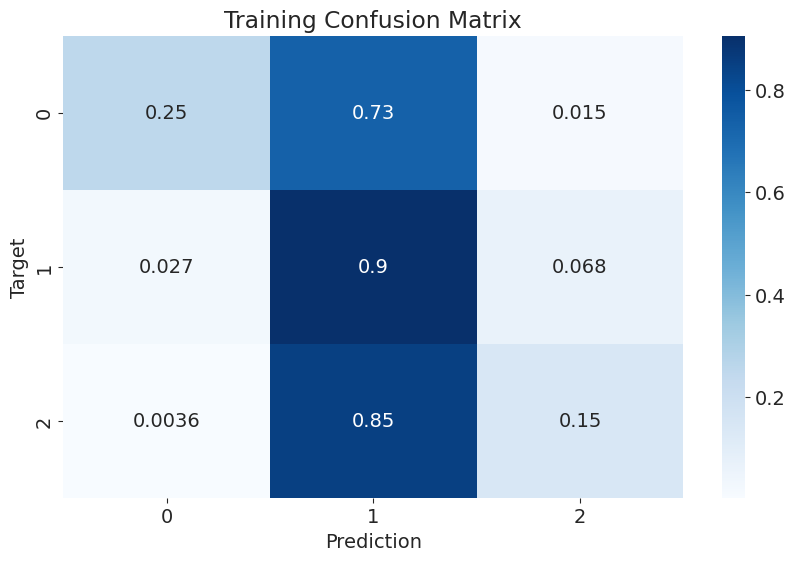

In [ ]:
train_preds = predict_and_plot(train_inputs, train_targets, 'Training')
# Explain one matrix 

The outcome which is `Confusion Matrix` for training dataset can be understand as:
* Left side of the above matrix shows class (0,1,2) which means `Damage_grade_1`,`Damage_grade_2`,`Damage_grade_3` on comparing with actual target value.
* Bottom of the matrix shows prediction of different class made by the chosen model
* On moving from the left to right and bottom to top class is `0` which means model prediction and actual value are same.And 0.25 number means that out of total prediction made 25% of value or prediction is True prediction
* Similarly on moving from left to right for actual target class is `0` but model has given the predicted `class` as 1.
* Again with same understanding we can see that actual target class is `1` but model has predicted as `0`
* And similarly for each target class we can see om moving from left to right corresponding to each actual target class and moving bottom to top will give the model predicted class value. 

And if we put the `validation_data` in the helper function created will get confusion matrix for the `validation_data` whose accuracy is 58.70 % which out of total prediction 58.7 time model is giving correct prediction w.r.t actual value.

Accuracy: 58.78%


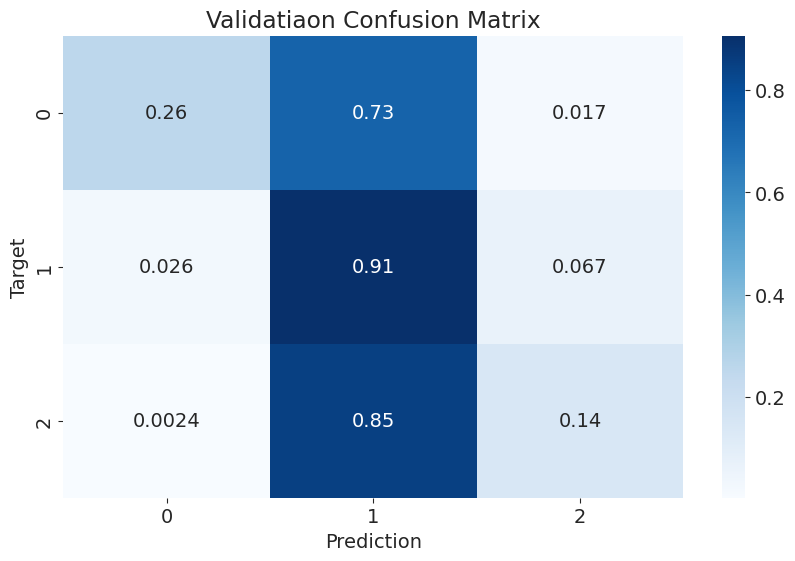

In [ ]:
val_preds = predict_and_plot(val_inputs, val_targets, 'Validatiaon')

As it is explicitly mentioned that model performance is being evaluated on `f1_Score` so calling the scikit-learn library and importing the f1_score method will give the actual `f1_score` for training data and similarily if we put the validation data, we will get the `f1_score` for validation data.

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,mean_squared_error,accuracy_score
Logistic_reg_train_F1_score=f1_score(train_targets, train_preds, average='macro')
Logistic_reg_val_F1_score=f1_score(val_preds,val_targets,average='macro')

In [ ]:
print("Logistic_regression_train_F1_score: {:.2f}%".format(Logistic_reg_train_F1_score * 100))
print("Logistic_regression_val_F1_score: {:.2f}%".format(Logistic_reg_val_F1_score * 100))

Logistic_regression_train_F1_score: 43.26%
Logistic_regression_val_F1_score: 43.47%


Looking `F_1` score of `training` and `validation` which are nearly equal.So we can infer that model is doing good in-terms of training and validation both because as much as good model is generalizing same about it is predicting. But the number ~`0.43` is not so good. Therefore we need to proceed ahead with other ML model. 

Among the other ML model tree based model gives good prediction in terms of complex dataset.Let's understand the comparatively studies between both:

Both Decision Tree Classifier and Logistic Regression are popular algorithms for classification problems. However, the choice of which algorithm to use depends on the nature of the data and the specific requirements of the problem at hand. Here are some reasons you might choose Decision Tree Classifier over Logistic Regression:

Non-linearity: Decision trees can model non-linear relationships between features and the target variable, while logistic regression assumes a linear relationship between the features and the target.

Interpretability: Decision trees are more interpretable than logistic regression. You can visualize the decision tree and understand how it is making predictions. Logistic regression, on the other hand, is less interpretable because it produces a single equation that combines all the features.

Handling Missing Values: Decision Trees can handle missing values in the dataset without any pre-processing. On the other hand, logistic regression requires imputing missing values before training the model, which can be time-consuming and computationally expensive.

Outliers: Decision trees are robust to outliers, while logistic regression can be sensitive to the presence of outliers.

Speed and Scalability: Decision Trees are fast to build and can handle large datasets with many features. Logistic Regression, on the other hand, can become slow or unstable when there are many features or the dataset is very large.

In summary, while Decision Tree Classification and Logistic Regression are both widely used for classification problems, the choice of which algorithm to use depends on the specific requirements of the problem, the nature of the data, and the resources available for model training and deployment.

## DecisionTreeClassifier: 

A decision tree classifier is a type of supervised learning algorithm that is commonly used for classification problems. It works by recursively partitioning the training data into smaller and smaller subsets, based on the values of input features, until the subsets contain only instances that belong to the same class. The final result is a tree-like structure, where each internal node represents a decision based on the value of a specific feature, and each leaf node represents the predicted class label for the samples that reach it.

To build a decision tree `classifier`, the algorithm starts with the entire dataset and selects the feature that provides the most information gain, or the highest reduction in `entropy` or `Gini` impurity, when used to split the dataset into smaller subsets. The process is then repeated recursively for each subset, until some stopping criterion is met, such as reaching a maximum depth or a minimum number of samples per leaf.

Decision tree classifiers have several advantages, including their interpretability, ability to handle non-linear relationships between features and the target variable, and robustness to `outliers`. However, they can also be prone to overfitting, particularly when the tree is allowed to grow too deep or the dataset is noisy. Techniques such as pruning, regularization, and `ensemble methods` like `Random Forest` can help to address these issues and improve the performance of the model.

Now as a part of IMPLEMENTATION of Decision Tree classifier we have to call [sklearn-library](https://scikit-learn.org/stable/modules/tree.html) and look for the IMPLEMENTATION for our required dataset.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_model = DecisionTreeClassifier(random_state=42)  # random_state will ensure same dataset is being choosen every time we make our model

In [ ]:
# .fit() is method for making model based on our required datastet
decision_model.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
decision_model.max_depth

Instead of defining model again & again and predicting the accuracy_score of the required model .Defining the helper function for making prediction and predicting the score of the model, and visualization of score can also be done by `confusion_matrix`

In [ ]:
def predict_and_plot_decision_tree(inputs, targets, name=''):
    from sklearn.metrics import confusion_matrix,f1_score,mean_squared_error,accuracy_score
    decision_tree_preds = decision_model.predict(inputs) 
    accuracy = accuracy_score(targets, decision_tree_preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, decision_tree_preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Decision tree Confusion Matrix'.format(name));
    
    return decision_tree_preds

Accuracy: 82.85%


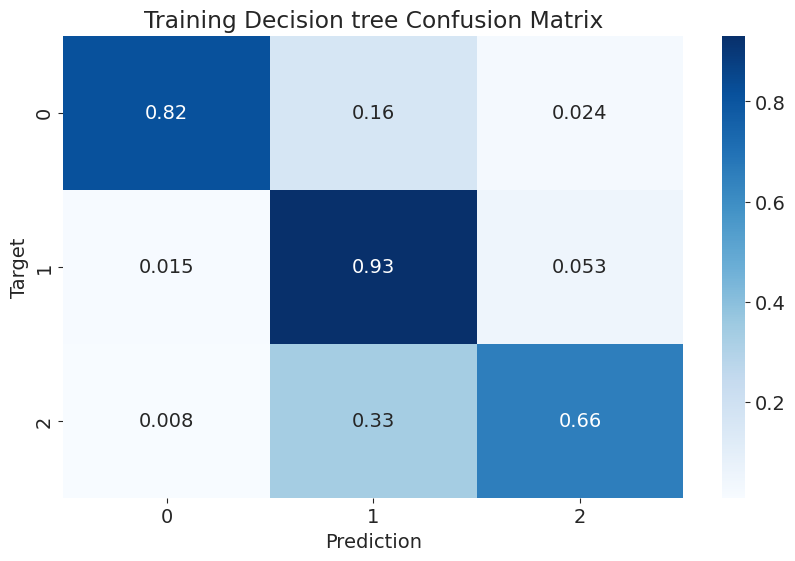

In [ ]:
decision_tree_train_preds=predict_and_plot_decision_tree(train_inputs, train_targets, 'Training')

Accuracy: 55.90%


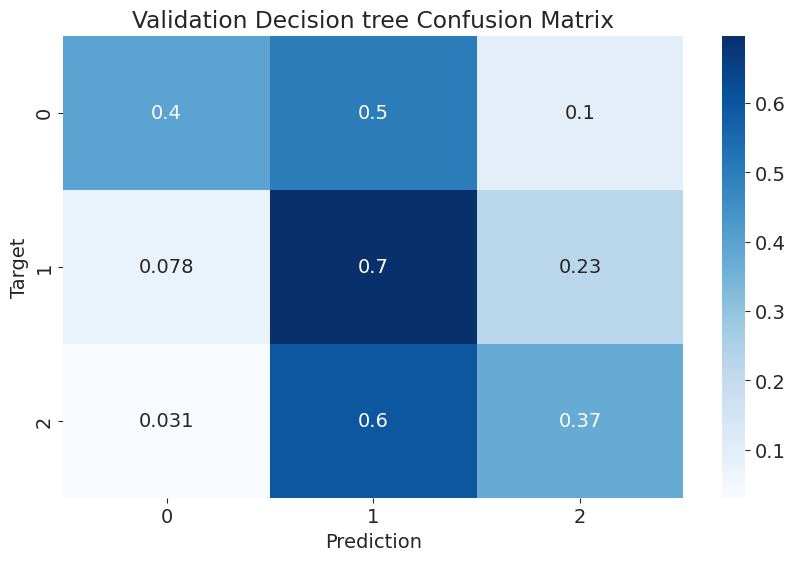

In [ ]:
decision_tree_val_preds =predict_and_plot_decision_tree(val_inputs, val_targets, 'Validation')

The use of `confusion_matrix` is like table that is used to evaluate the performance of a classification model by comparing the predicted class labels with the true class labels of a set of test samples. It provides a concise summary of the model's performance by showing the number of true positives, true negatives, false positives, and false negatives, with respect to each class label. The entries in the confusion matrix are the counts of the number of instances that belong to each combination of predicted and true class labels.

Here's an example of a confusion matrix for a binary classification problem:

Predicted Positive:Predicted Negative:
* True Positive	50 :10
* True Negative	5 :	100

In the above matrix, the rows represent the true class labels, while the columns represent the predicted class labels. The cells in the diagonal represent the number of correctly classified instances, while the cells outside the diagonal represent the misclassified instances.

A confusion matrix is helpful for classification problems because it provides a detailed and informative evaluation of the model's performance, beyond simple accuracy. For example, it can be used to calculate metrics such as precision, recall, F1-score, and accuracy, which can help to identify areas of improvement for the model. Additionally, it can help to identify specific types of errors that the model is making, such as false positives or false negatives, which can provide insight into the behavior of the model and suggest potential areas for improvement.

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,mean_squared_error,accuracy_score
Decision_tree_training_f1_score=f1_score(train_targets, decision_tree_train_preds, average='macro')
Decision_tree_validation_f1_score=f1_score(val_targets, decision_tree_val_preds, average='macro')

In [ ]:
print('F1_Score of Decision tree Confusion Matrix for training data is: {} '.format(Decision_tree_training_f1_score))
print('F1_Score of Decision tree Confusion Matrix for validation data is : {}'.format(Decision_tree_validation_f1_score))

F1_Score of Decision tree Confusion Matrix for training data is: 0.8190189202823813 
F1_Score of Decision tree Confusion Matrix for validation data is : 0.4921460149385748


On looking the the `F1` score of the training set is greater than that of the validation set, it suggests that the model may be `overfitting` the training data.`Overfitting` occurs when a model has learned the specific features or noise in the training data, to the point that it performs well on the training data but not on new, unseen data. When the F1 score of the training set is high, it means that the model is able to accurately classify the training data, but this may not necessarily generalize to new data, which is represented by the validation set.

Defining helper function for printing the `importance` of `features` based on numerical scale. So the model.feature_importances_ attribute returns an array of importance scores, where each score corresponds to the importance of the feature at the corresponding index in the

In [ ]:
def diff_model_feature_importance(model,name=''):
    importance_df=pd.DataFrame({
        'Feature': train_inputs.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plotting of the different features based on respective model
    plt.title('{} feature Importance'.format(name))
    sns.barplot(data=importance_df.head(15), x='Importance', y='Feature');
    return importance_df

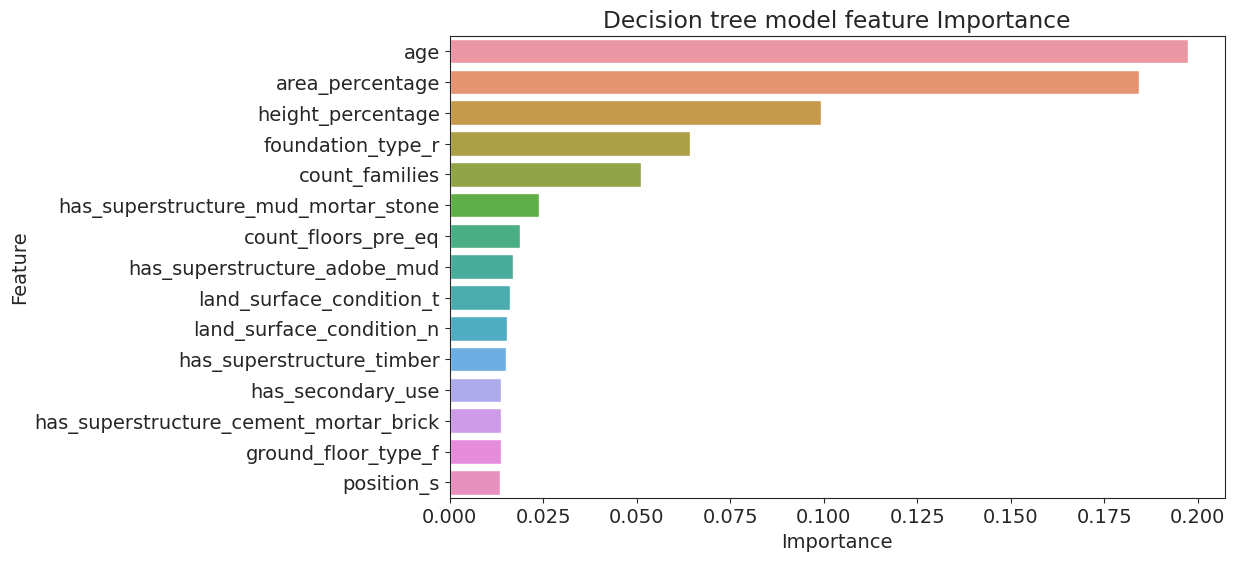

In [ ]:
decision_tree_model_feature_importance=diff_model_feature_importance(decision_model,'Decision tree model')

This allows us to easily inspect and analyze the feature importances, and to possibly use them to make decisions about feature selection, feature engineering, or other aspects of the modeling process. So from the above diagram we can see that `age` & `area_percentage`of property is being given more weight over other in `Decision_tree` model, followed by other.

On inspecting this also true, property whose is age is more means older is prone to more sever damage during Earth-quake.

In [ ]:
from sklearn.tree import plot_tree, export_text

`plot_tree` and `export_text` are two functions that are part of the sklearn.tree module in scikit-learn, a popular machine learning library in Python.

`plot_tree` is a function that allows you to visualize a decision tree classifier or regression model by creating a plot of the tree's nodes and branches. The resulting plot can help you better understand the structure and complexity of the tree, and how it is making predictions based on the input features.


`export_text` is a function that allows you to obtain a textual representation of a decision tree classifier or regression model. The resulting text can help you understand how the tree is making decisions based on the input features, and can be useful for debugging or model interpretation.

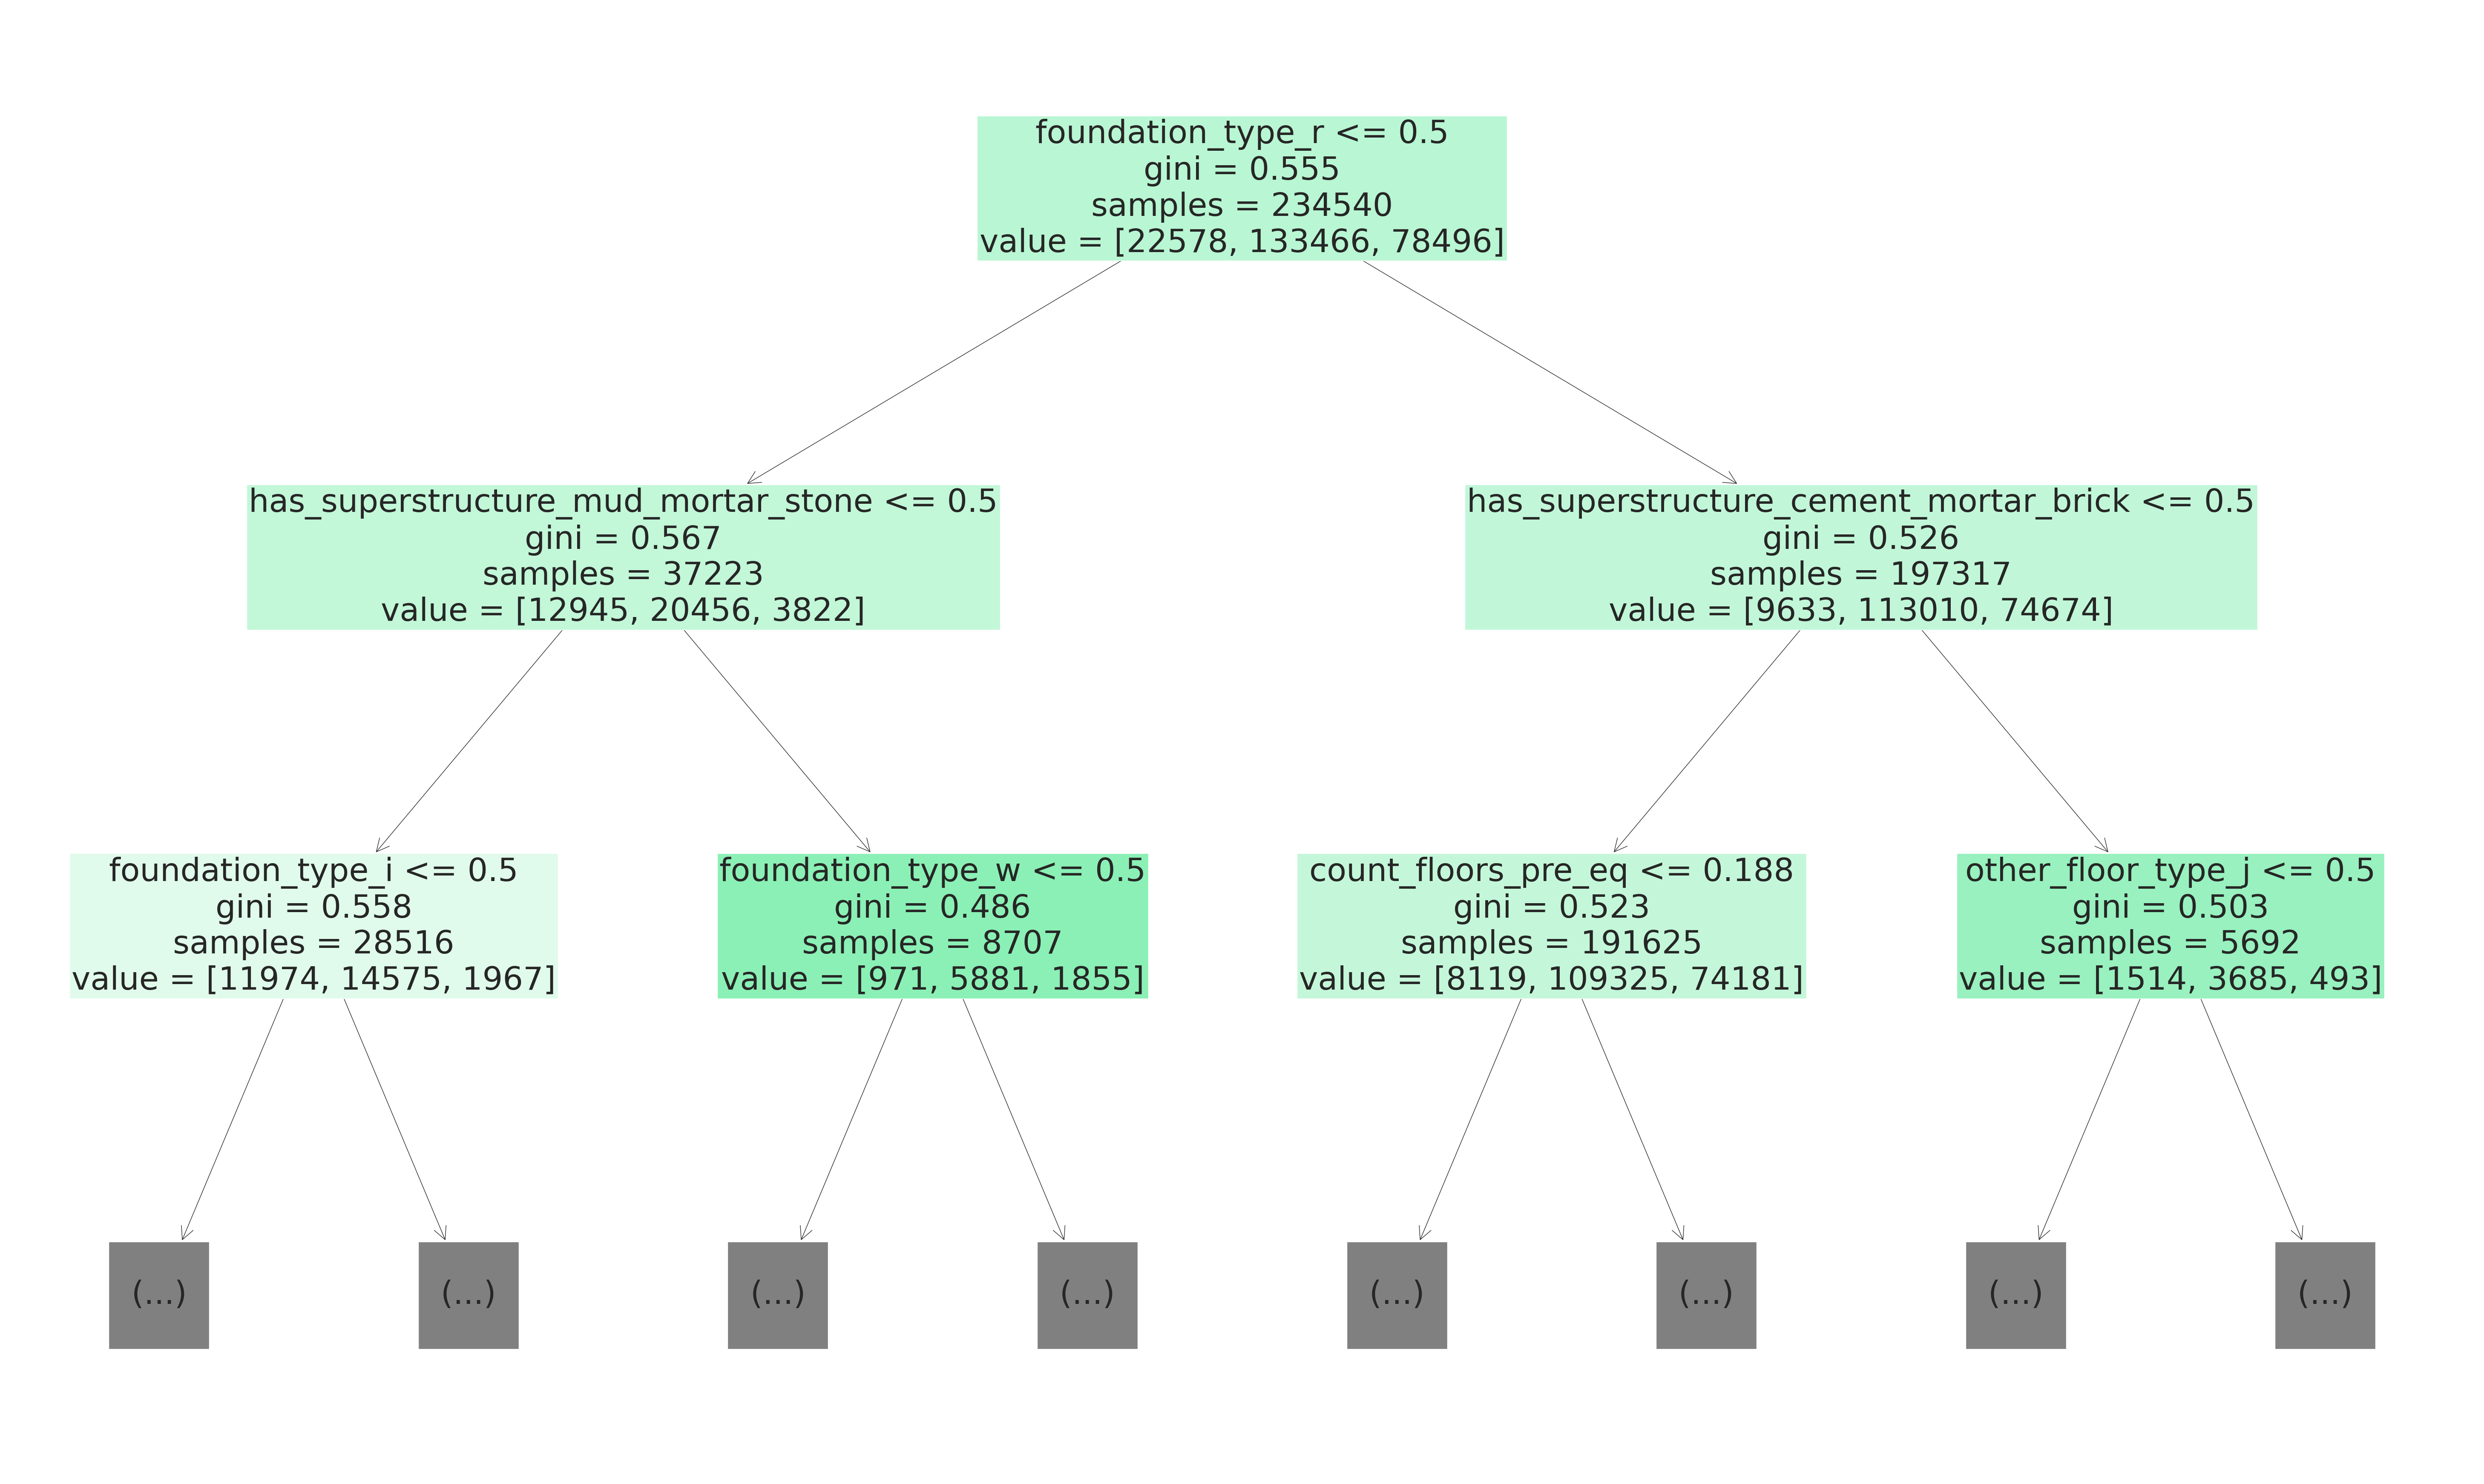

In [ ]:
plt.figure(figsize=(75,45))
plot_tree(decision_model, feature_names=train_inputs.columns, max_depth=2, filled=True,fontsize=54);

decision_model.tree_.max_depth

In [ ]:
tree_text = export_text(decision_model, max_depth=10, feature_names=list(train_inputs.columns))
print(tree_text[:50])

|--- foundation_type_r <= 0.50
|   |--- has_supers


In [ ]:
decision_model.feature_importances_

array([1.87646471e-02, 1.97260643e-01, 1.84197845e-01, 9.93121090e-02,
       1.70850391e-02, 2.40319175e-02, 1.33641688e-02, 7.11843441e-03,
       1.23740344e-02, 1.37501773e-02, 1.51996817e-02, 1.24943087e-02,
       1.01630655e-02, 2.08661770e-03, 7.79829763e-03, 5.11861516e-02,
       1.38186477e-02, 9.00909696e-03, 6.43909048e-03, 2.48731758e-03,
       4.70824344e-04, 3.68860730e-04, 9.47069318e-04, 1.13081315e-04,
       8.95785831e-05, 9.12841490e-05, 1.90724530e-03, 1.52755877e-02,
       7.52171413e-03, 1.60479460e-02, 1.78900800e-03, 6.31646414e-03,
       6.42325511e-02, 1.39392754e-03, 2.42656541e-03, 1.05652471e-02,
       1.21275540e-02, 3.64478997e-03, 1.36804920e-02, 1.11044867e-03,
       7.07832435e-03, 1.33341613e-02, 1.86550081e-03, 5.49198870e-03,
       9.32925999e-03, 2.32119512e-03, 8.04597636e-03, 7.78959229e-03,
       1.31414401e-03, 1.35514363e-02, 1.23619628e-02, 5.18985313e-04,
       5.55314765e-04, 8.15461984e-03, 2.46423021e-05, 3.51379771e-05,
      

`decision_model.feature_importances_` is an attribute of a trained `decision_tree_classifier` model that contains an array of feature importances. Each element of the array corresponds to a feature in the dataset used to train the model, and the value of the element represents the relative importance of that feature for making predictions with the model.

The feature importances are calculated during the training of the decision tree, and they reflect how much each feature contributes to the decision-making process of the tree. Features with higher importances are considered to be more important in determining the final output of the model, while features with lower importances are considered to be less important.

The feature importances can be used to gain insights into how the model is making predictions, to identify which features are most relevant to the target variable, and to guide feature selection or feature engineering efforts. For example, if some of the features have very low importances, they can potentially be removed from the dataset without significantly affecting the performance of the model, which can make the modeling process more efficient.

Here's an example of how to access the feature importances from a trained decision tree classifier model:

## Hyperparameter tunning:
In machine learning, hyperparameter tuning refers to the process of selecting the best set of hyperparameters for a given model. Hyperparameters are parameters of a machine learning model that are not learned from the data, but are set before training the model. Examples of hyperparameters include the learning rate in a neural network, the number of trees in a random forest, the regularization parameter in a linear regression model, and the kernel function in a support vector machine (SVM) model.

Hyperparameter tuning is important because different sets of hyperparameters can lead to vastly different performance of a model on a given dataset. By selecting the best set of hyperparameters, we can improve the accuracy, efficiency, and generalization ability of a model.

There are different approaches to hyperparameter tuning, ranging from manual tuning to automated tuning using libraries such as scikit-learn's GridSearchCV or RandomizedSearchCV. In manual tuning, the hyperparameters are manually set and adjusted based on the performance of the model on a validation set. In automated tuning, a search algorithm is used to explore the hyperparameter space and find the best set of hyperparameters based on a predefined objective function, such as accuracy or cross-validation score.

So below code we will be implement the manual tunning of required hyperparameter for particular machine learning model and get model getting generalised so that prepared model give good prediction on new set of data.

Let's call the helper function named `test_params_decision_tree` which enters numeric value of different parameter into the model to test performance of prepared model.

In [ ]:
def test_params_decision_tree(**params):
    from sklearn.metrics import confusion_matrix,f1_score,mean_squared_error
    from sklearn.tree import DecisionTreeClassifier
    decision_model = DecisionTreeClassifier(random_state=42,**params).fit(train_inputs, train_targets)
    
    Decision_tree_training_f1_score=f1_score(train_targets,
    
                                             decision_model.predict(train_inputs), 
                                             
                                             average='macro')
    
    
    Decision_tree_validation_f1_score=f1_score(val_targets,
                                               
                                               decision_model.predict(val_inputs), 
                                               
                                               average='macro')
    
    
    return Decision_tree_training_f1_score, Decision_tree_validation_f1_score

After defining `model_name_test_params` for entering range of numeric_value, now the outcomes of model against each numeric value need to be plotted, so a new helper function name `test_param_and_plot_decision_tree` has been used getting the pictorial representation of model_performance,which is used for the comparision of `training` and `validation` 

In [ ]:
def test_param_and_plot_decision_tree(param_name, param_values,**params):
    train_f1_score,val_f1_score = [], []
    for value in param_values:
        #params = {param_name: value}
        params[param_name]=value
        train_f1,val_f1 = test_params_decision_tree(**params)[0:2]
        train_f1_score.append(train_f1)
        val_f1_score.append(val_f1)
    
    plt.figure(figsize=(10,10))
    plt.plot(param_values,train_f1_score,'b-o')
    plt.plot(param_values,val_f1_score,'r-o')
    plt.xlabel(param_name)
    plt.ylabel('F_1_score')
    plt.title('F1_Score w.r.t'+' '+ param_name)
    plt.legend(['Training', 'Validation'])
    plt.grid()
    plt.savefig('F1_Score w r t '+param_name+'.png',dpi=400)

In a Decision Tree model, the max_depth parameter specifies the maximum depth or level of the tree. The depth of a decision tree is defined as the length of the longest path from the root node to a leaf node. A large value of max_depth can lead to `overfitting`, where the model becomes too complex and captures noise in the data, while a small value of `max_depth` can lead to `underfitting`, where the model is too simple and fails to capture the underlying patterns in the data.

So we have to find the optimal value of `max_depth`( that's why passing series of value),one can experiment with different values and evaluate the performance of the model using cross-validation or a validation set.

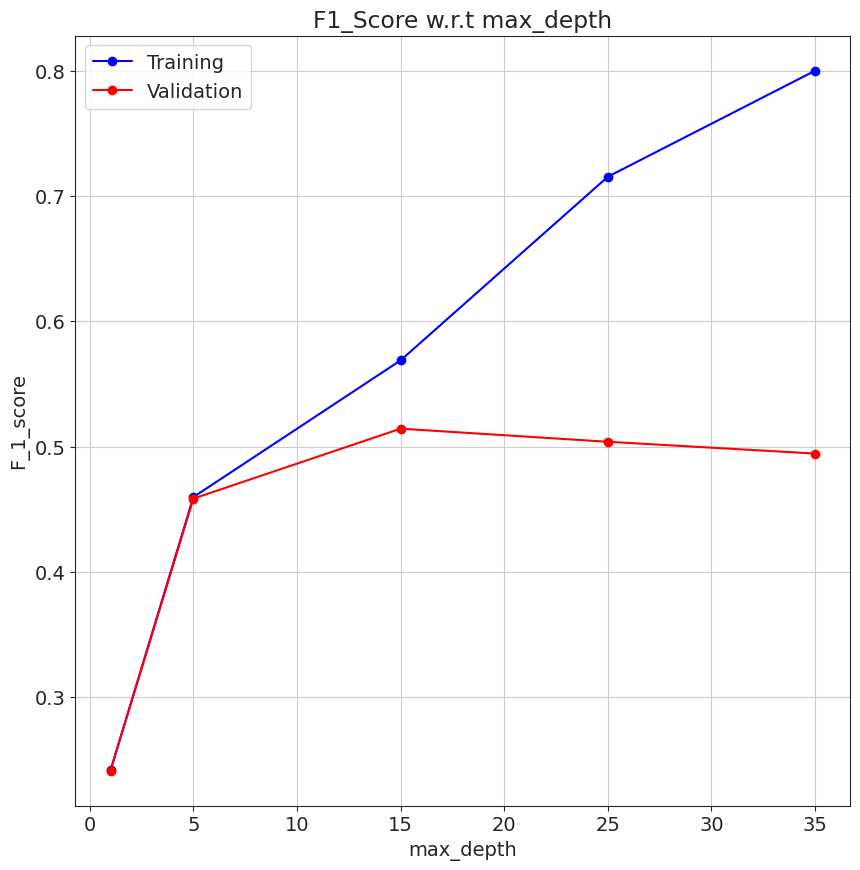

In [ ]:
test_param_and_plot_decision_tree('max_depth', [1,5,15,25,35])

Among different parameter`max_leaf_nodes` parameter specifies the maximum number of leaf nodes that the tree should have. A leaf node is a node that does not have any child nodes, and represents a final decision made by the tree. By limiting the maximum number of leaf nodes, we can control the size and complexity of the tree, and prevent overfitting.

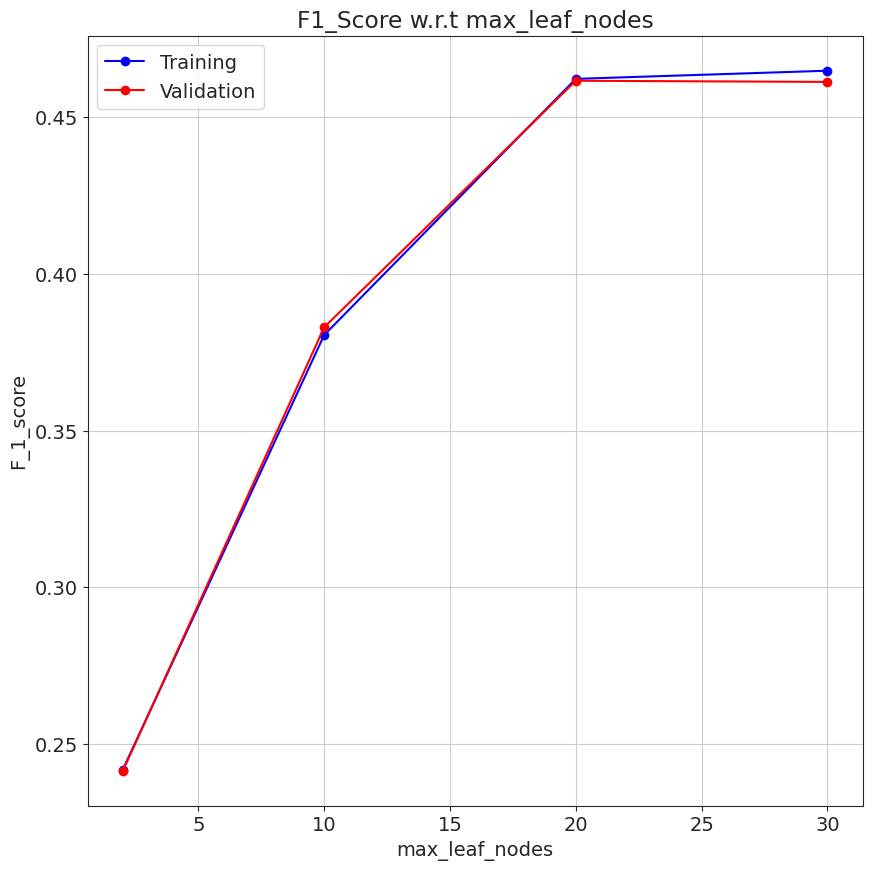

In [ ]:
test_param_and_plot_decision_tree('max_leaf_nodes', [2,10,20,30],max_depth=15)

 Best on the above graphs we have observed that when the value of `max_leaf_nodes` is 20. The `F_1`score of training and validation are very close as well as better than `base_line_model`. 

Apart from other parameter which goes inside making of model `min_samples_leaf`is parameter which meant for that specifies the minimum number of samples required to be at a leaf node. A leaf node is a node that does not have any child nodes and represents a final decision made by the tree. By setting `min_samples_leaf`, we can control the minimum number of samples required to form a leaf node, which can help prevent overfitting.

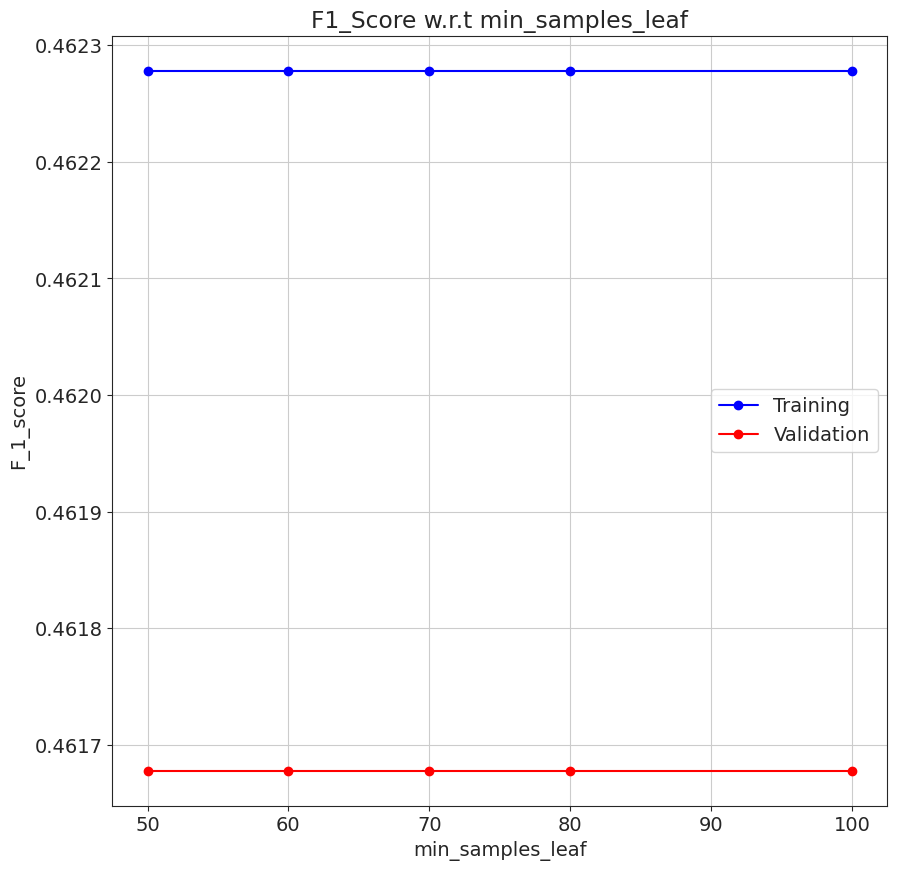

In [ ]:
test_param_and_plot_decision_tree('min_samples_leaf', [50,60,70,80,100],max_depth=15,max_leaf_nodes=20)

On looking the above graphs which is for the variation of `min_samples_leaf` and model performance there isn't improvement in performance measures, despite changing the values.After putting the optimized value of `max_depth`,`max_leaf_node` and `min_samples_leaf` for getting the best model, still the training and validation `F_1` score is ~0.46

Since there is no one-size-fits-all answer to this question as it depends on the specific problem and dataset at hand. However, here are some general points to consider:

Decision trees are simpler and easier to interpret compared to random forests. A single decision tree can be visualized and understood easily, while the combination of multiple trees in a random forest can be harder to interpret. Decision trees can also provide information about the most important features for the prediction, which can be useful for feature selection and understanding the underlying relationships in the data.

* Random forests are more robust and less prone to overfitting compared to decision trees. A single decision tree can easily overfit the training data and perform poorly on the test data, while the combination of multiple trees in a random forest can reduce the variance and improve the generalization performance of the model. Random forests are also less sensitive to noisy data and outliers, and can handle a larger number of input features.

* Random forests are computationally more expensive compared to decision trees, especially for large datasets and a large number of trees. Training a random forest requires building multiple trees on subsets of the training data and the input features, which can be time-consuming and memory-intensive.

In summary, decision trees are preferred when interpretability and simplicity are more important, while random forests are preferred when accuracy and robustness are more important. However, it is always a good practice to try both methods and evaluate their performance on the specific problem and dataset at hand.

## Random forest:

As we can infer that on choosing the one decision tree has improved the model performance significantly but is it best? What is one took combination of multiple decision tree which is called `Random forest` , will there be change in performance measure of model.

So we let's try to understand the working of `random_forest`.


There is no one-size-fits-all answer to this question as it depends on the specific problem and dataset at hand. However, here are some general points to consider:

Decision trees are simpler and easier to interpret compared to random forests. A single decision tree can be visualized and understood easily, while the combination of multiple trees in a random forest can be harder to interpret. Decision trees can also provide information about the most important features for the prediction, which can be useful for feature selection and understanding the underlying relationships in the data.

Random forests are more robust and less prone to overfitting compared to decision trees. A single decision tree can easily overfit the training data and perform poorly on the test data, while the combination of multiple trees in a random forest can reduce the variance and improve the generalization performance of the model. Random forests are also less sensitive to noisy data and outliers, and can handle a larger number of input features.

Random forests are computationally more expensive compared to decision trees, especially for large datasets and a large number of trees. Training a random forest requires building multiple trees on subsets of the training data and the input features, which can be time-consuming and memory-intensive.

In summary, decision trees are preferred when interpretability and simplicity are more important, while random forests are preferred when accuracy and robustness are more important. However, it is always a good practice to try both methods and evaluate their performance on the specific problem and dataset at hand.

 As explain point above for the `decision_tree`, same helper function can be used by defining different classifier and putting inside the required helper function.
 
 To avoid duplication of the variable and function_name we will change the function name and keep the name of the model what we are making.

In [ ]:
# Helper function for defining random_forest and taking inputs and target for training and validation dataset

def predict_and_plot_random_forest(inputs, targets, name=''):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,mean_squared_error
    rf1 = RandomForestClassifier(max_depth=2,random_state=0)
    rf1.fit(train_inputs, train_targets)
    random_forest_preds = rf1.predict(inputs) 
    accuracy = accuracy_score(targets, random_forest_preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, random_forest_preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{}Random forest Confusion Matrix'.format(name))
    return random_forest_preds

Accuracy: 56.91%


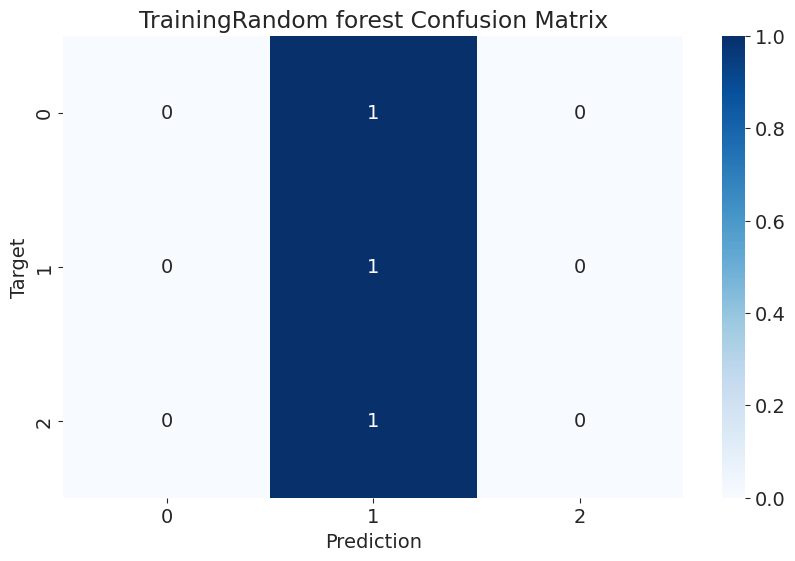

In [ ]:
random_forest_train_preds=predict_and_plot_random_forest(train_inputs, train_targets, 'Training')

So the performance measures of model is giving 0.56 on the training dataset.

Accuracy: 56.76%


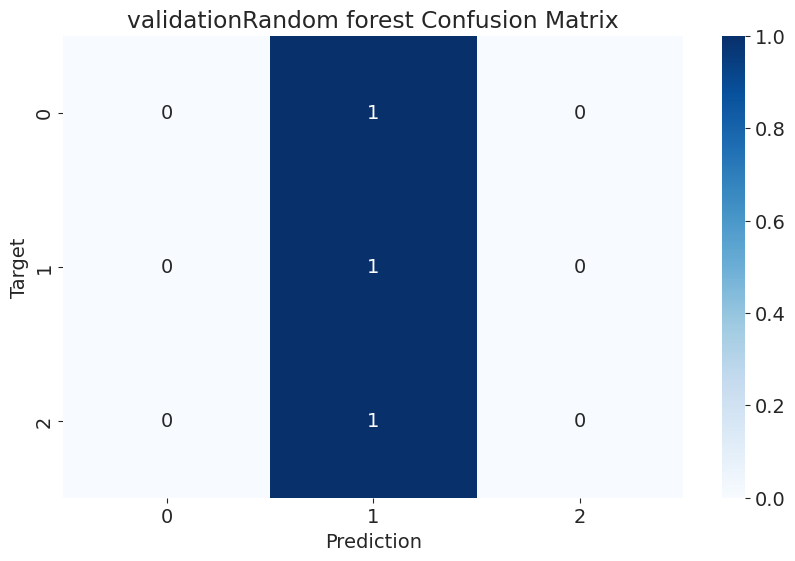

In [ ]:
random_forest_val_preds=predict_and_plot_random_forest(val_inputs, val_targets, 'validation')

On calling the defined helper-function `predict_and_plot_random_forest(val_inputs,val_targets) `and passing validation dataset, the performance of model is coming as 0.56. Now this accquaracy is close training performance.

Now on twining model, so that we get better performance for given dataset, we can try to get better model so that model get generalized and give better prediction for unknown_dataset.

### Hyperparameters tunning of Random forest:

In [ ]:
def random_forest_test_params(**params):
    from sklearn.metrics import confusion_matrix,f1_score,mean_squared_error
    from sklearn.ensemble import RandomForestClassifier
    rf1 = RandomForestClassifier(random_state=42,**params).fit(train_inputs, train_targets)
    Random_forest_training_f1_score=f1_score(train_targets, rf1.predict(train_inputs), average='macro')
    Random_forest_validation_f1_score=f1_score(val_targets, rf1.predict(val_inputs), average='macro')
    return Random_forest_training_f1_score,Random_forest_validation_f1_score

In [ ]:
def random_forest_test_param_and_plot(param_name, param_values,**params):
    train_f1_score,val_f1_score = [], []
    for value in param_values:
        params[param_name]=value
        #params = {param_name: value} 
        train_f1,val_f1 = random_forest_test_params(**params)[0:2]
        train_f1_score.append(train_f1)
        val_f1_score.append(val_f1)
    
    plt.figure(figsize=(10,10))
    plt.plot(param_values,train_f1_score,'b-o')
    plt.plot(param_values,val_f1_score,'r-o')
    plt.xlabel(param_name)
    plt.ylabel('F_1_score')
    plt.title('Random_forest'+ ' '+'F1_Score w.r.t'+' '+ param_name)
    plt.legend(['Training', 'Validation'])
    plt.grid()

In the below cell we are passing different parameter with single value inside the helper function, and checking the performance of model.

In [ ]:
random_forest_test_params(n_estimators=25, max_depth=13)

(0.49732356292801555, 0.4739566514774129)

In [ ]:
?rf1

We will start with `max_depth` parameter inside the model: In the context of Random Forest, max_depth is a hyperparameter that determines the maximum depth of each decision tree in the forest.

`max_depth` limits the number of splits that can be made for each tree in the forest, and can help prevent overfitting of the model to the training data. An overly complex model, with a high max_depth, can fit the training data too closely, resulting in poor performance on new, unseen data.

Hence based on the performance measure of prepared model we should give due consideration on choosing the range of `numerical_value` so that it avoid over fitting.

CPU times: user 4min 48s, sys: 2.02 s, total: 4min 50s
Wall time: 4min 53s


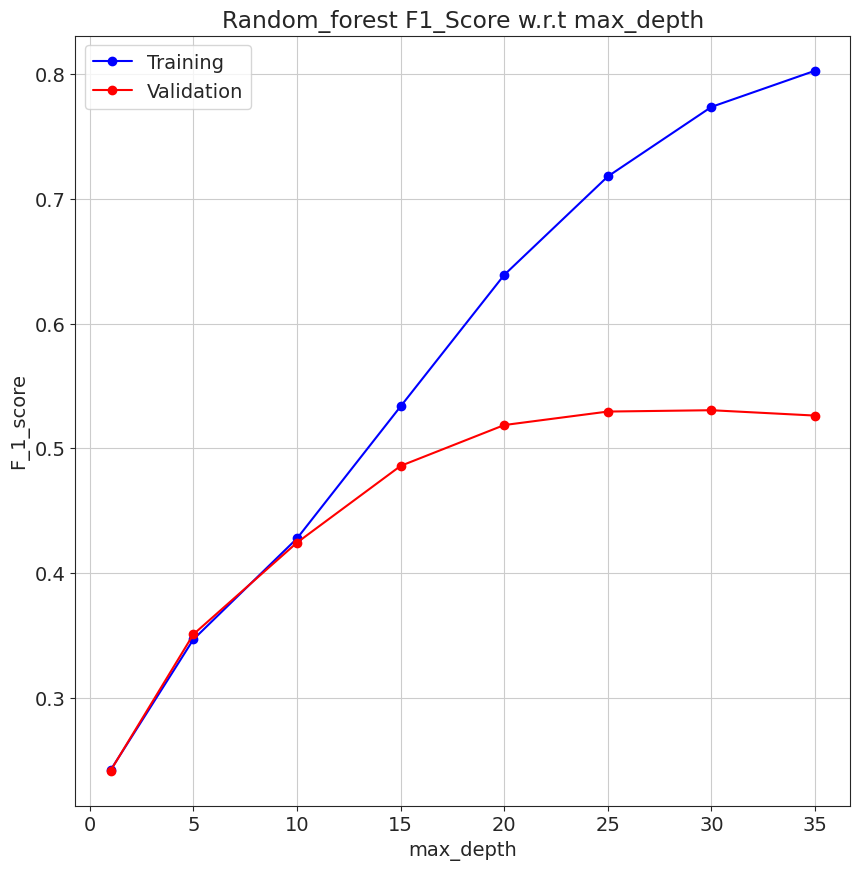

In [ ]:
%%time
random_forest_test_param_and_plot('max_depth', [1,5, 10, 15, 20, 25, 30, 35])

Another parameter should be given inside model could be `n_estimator` : Now in Random Forest, `n_estimators` is a hyperparameter that determines the number of decision trees to be included in the forest. Random Forest is an ensemble learning method that combines multiple decision trees to make predictions by averaging or voting the predictions of each individual tree.

Increasing `n_estimators` can improve the performance of the model by reducing the impact of individual trees that may overfit the training data.

However, increasing `n_estimators` also increases the computational cost and training time of the model, so there is a `trade-off` between `model performance` and `computational resources`.

CPU times: user 1min 34s, sys: 419 ms, total: 1min 35s
Wall time: 1min 40s


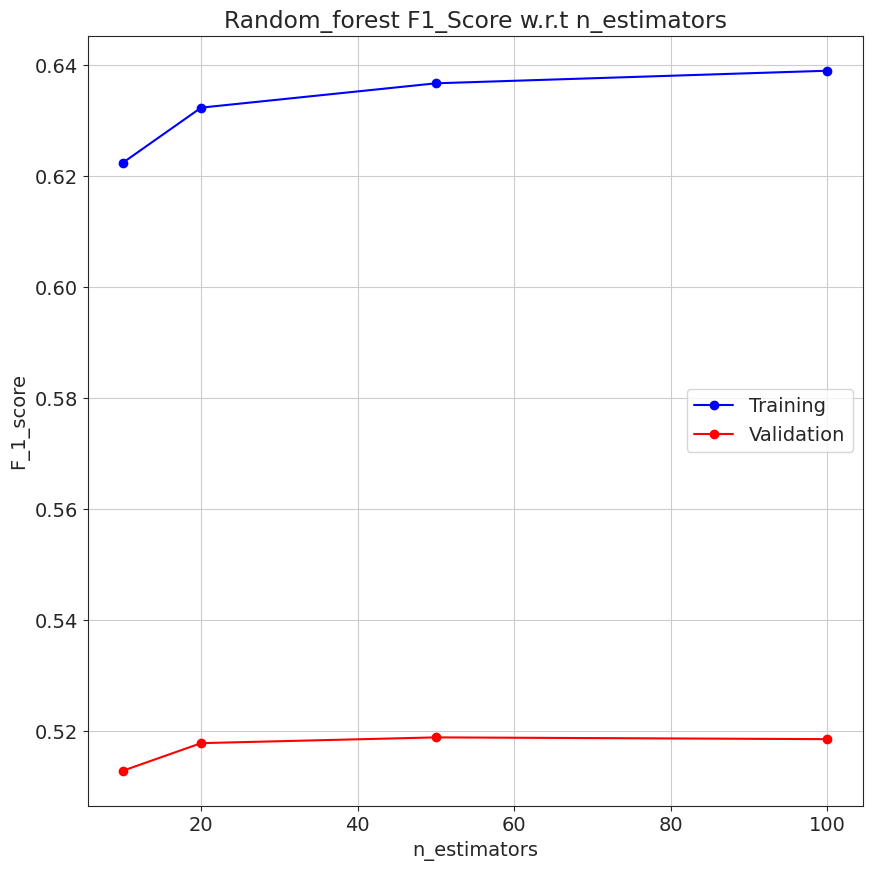

In [ ]:
%%time
random_forest_test_param_and_plot('n_estimators', [10, 20, 50,100],max_depth=20)

As discussed before hand, as it is intended that `model` should be generalize so that on new unseen data we will get the best performance of model.So looking the graphs when numerical value of `n_estimator` is 52 training and validation score is coming higher,still training score is on upper hand.

In Random Forest, criterion is a parameter that determines the function used to measure the quality of a split when building decision trees. Decision trees are the building blocks of Random Forest, and they are used to make predictions by recursively splitting the data into subsets based on the values of the features. criterion is a key hyperparameter that affects the performance of the tree and the overall model.

The two most common functions used for measuring the quality of a split are `gini` and entropy. `gini` measures the impurity or diversity of a set of samples, where a low `gini` score indicates that most samples belong to the same class. entropy measures the level of disorder or uncertainty in a set of samples, where a low entropy score indicates that most samples belong to the same class. Both `gini` and entropy are used to guide the tree-building process by selecting the feature and threshold that results in the best split.

In general, `gini` is faster to compute than entropy, but may result in slightly different trees and predictions. The choice of criterion depends on the specific problem at hand and can be determined through hyperparameter tuning, where different values are tried and evaluated on a validation set.

In [ ]:
%%time
random_forest_test_param_and_plot('criterion',['gini'])


Apart from above parameter there is another parameter which play key role is `min_samples_split` in giving prediction for unseen data.
In Random Forest, `min_samples_split` is a hyperparameter that determines the minimum number of samples required to split an internal node in a decision tree. When growing a decision tree, the algorithm recursively splits the data into subsets based on the values of the features, until some stopping criteria are met.

Setting `min_samples_split` to a higher value results in a simpler tree with fewer decisions and less chance of overfitting the training data. On the other hand, setting min_samples_split to a lower value results in a more complex tree that can capture more nuances and details of the data, but may also overfit the training data or be more sensitive to noise.

CPU times: user 5min 23s, sys: 1.44 s, total: 5min 24s
Wall time: 5min 30s


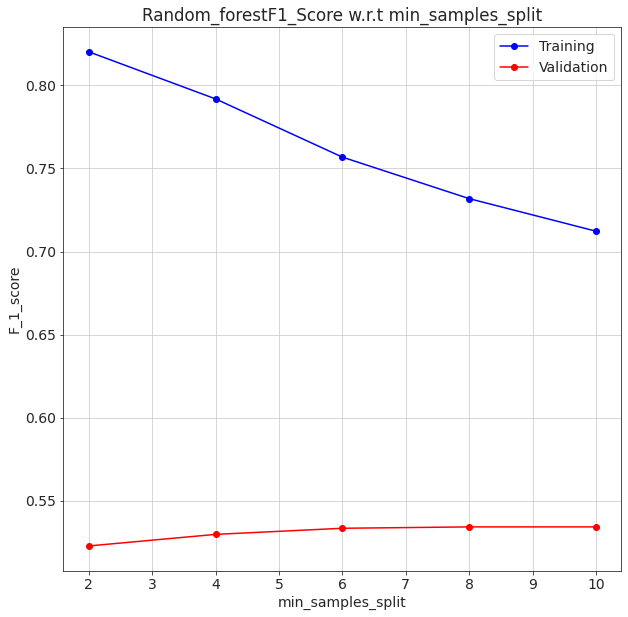

In [ ]:
%%time
random_forest_test_param_and_plot('min_samples_split',[2,4,6,8,10])

On looking the above graphs the value near which there is minimal difference between training and validation model score, comes near `min_samples_split`  is 10.

`min_samples_leaf` is a key hyperparameter that affects the generalization and robustness of the tree and the overall model. Setting min_samples_leaf to a higher value results in a tree with more generalization and less overfitting, as it forces the tree to stop splitting when the number of samples in a leaf node is below the threshold.

In Random Forest, `min_samples_leaf` is a hyperparameter that determines the minimum number of samples required to be in a leaf node in a decision tree. Leaf node is a node that does not have any child nodes, and it represents the final output or prediction of the decision tree for a given input.

CPU times: user 4min 24s, sys: 799 ms, total: 4min 24s
Wall time: 4min 45s


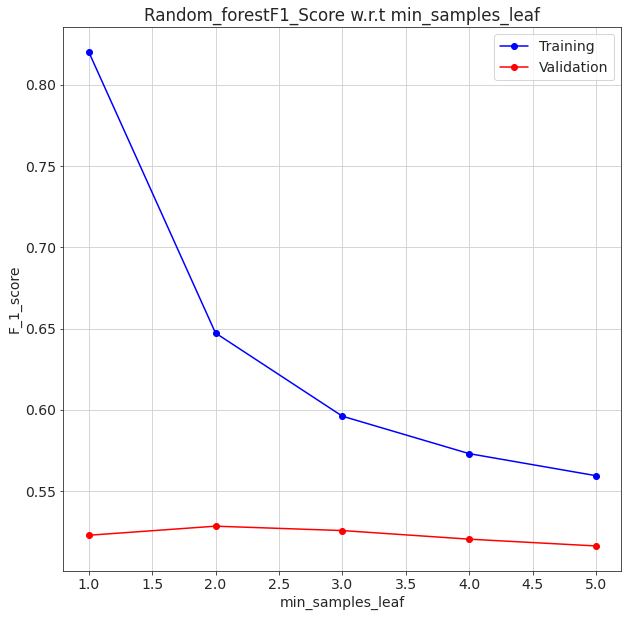

In [ ]:
%%time
random_forest_test_param_and_plot('min_samples_leaf',[1,2,3,4,5])

In Random Forest, `max_features` is a hyperparameter that determines the maximum number of features to consider when looking for the best split at each node. This hyperparameter controls the randomness and diversity of the trees in the forest, and can affect the performance and generalization of the model.

 A larger dataset or a more complex problem may benefit from a lower value of `max_features` to increase diversity and reduce overfitting, while a smaller dataset or a simpler problem may benefit from a higher value of max_features to capture more information and improve accuracy.

In [ ]:
def random_forest_model_feature_importance(model,name=''):
    random_forest_importance_df=pd.DataFrame({
        'Feature': train_inputs.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plotting of the different features based on respective model
    plt.title('{} feature Importance'.format(name))
    sns.barplot(data=random_forest_importance_df.head(15), x='Importance', y='Feature');
    return random_forest_importance_df

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(max_depth=15).fit(train_inputs,train_targets)
random_forest_model_feature_importance(rf1,'random_forest')

## XG Boost 

In [ ]:
def predict_and_plot_xgboost(inputs, targets, name=''):
  from sklearn.ensemble import GradientBoostingClassifier
  xgboost_model = GradientBoostingClassifier(random_state=42).fit(train_inputs, train_targets)
  xgboost_preds=xgboost_model.predict(inputs)
  accuracy = accuracy_score(targets, xgboost_model.predict(inputs))
  print("Accuracy: {:.2f}%".format(accuracy * 100))
  cf = confusion_matrix(targets, xgboost_model.predict(inputs), normalize='true')
  plt.figure()
  sns.heatmap(cf, annot=True, cmap='Blues')
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} XG Boost model Confusion Matrix'.format(name));
  return xgboost_preds

Accuracy: 60.06%


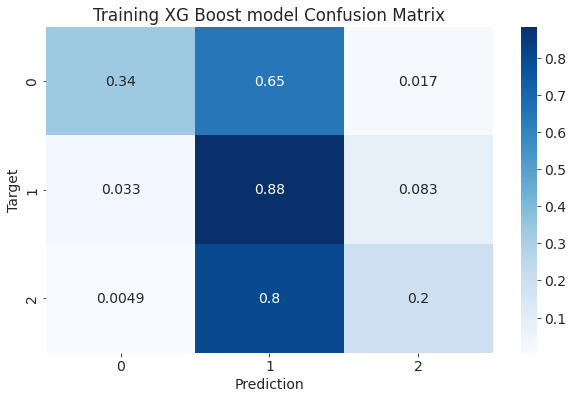

In [ ]:
%%time
XG_boost_train_preds=predict_and_plot_xgboost(train_inputs, train_targets, 'Training')

Accuracy: 60.12%
CPU times: user 2min 42s, sys: 390 ms, total: 2min 43s
Wall time: 3min 2s


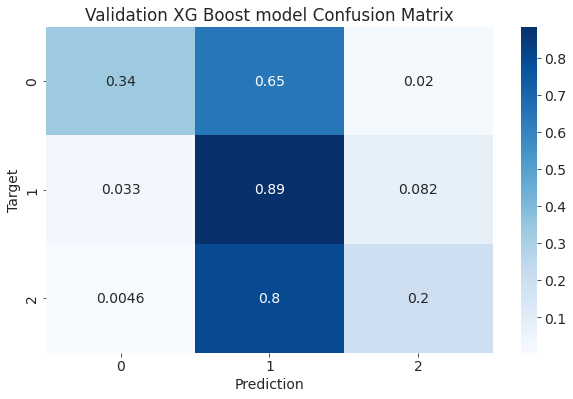

In [ ]:
%%time
XG_boost_val_preds=predict_and_plot_xgboost(val_inputs, val_targets, 'Validation')

In [ ]:
%%time
XG_Boost_training_f1_score=f1_score(train_targets, XG_boost_train_preds, average='macro')

CPU times: user 99.6 ms, sys: 0 ns, total: 99.6 ms
Wall time: 121 ms


In [ ]:
%%time
from sklearn.metrics import confusion_matrix,f1_score,mean_squared_error
XG_Boost_validation_f1_score=f1_score(val_targets, XG_boost_val_preds, average='macro')

CPU times: user 13 ms, sys: 0 ns, total: 13 ms
Wall time: 15.1 ms


In [ ]:
%%time
print('F1_Score of Decision tree Confusion Matrix for training data is: {} '.format(XG_Boost_training_f1_score))
print('F1_Score of Decision tree Confusion Matrix for validation data is : {}'.format(XG_Boost_validation_f1_score))

F1_Score of Decision tree Confusion Matrix for training data is: 0.48126061406183335 
F1_Score of Decision tree Confusion Matrix for validation data is : 0.48196062474928203
CPU times: user 1.61 ms, sys: 0 ns, total: 1.61 ms
Wall time: 1.59 ms


### Hyperparameter of XG Boost classifier

In [ ]:
def XG_Boost_test_params(**params):
    from sklearn.ensemble import GradientBoostingClassifier
    xgboost_model = GradientBoostingClassifier(random_state=42).fit(train_inputs, train_targets)
    XG_Boost_training_f1_score=f1_score(train_targets, xgboost_model.predict(train_inputs), average='macro')
    XG_Boost_validation_f1_score=f1_score(val_targets, xgboost_model.predict(val_inputs), average='macro')
    return XG_Boost_training_f1_score,XG_Boost_validation_f1_score

In [ ]:
def XG_Boost_test_param_and_plot(param_name, param_values):
    train_f1_score,val_f1_score = [], []
    for value in param_values:
        params = {param_name: value} 
        train_f1,val_f1 = XG_Boost_test_params(**params)[0:2]
        train_f1_score.append(train_f1)
        val_f1_score.append(val_f1)
    
    plt.figure(figsize=(10,10))
    plt.plot(param_values,train_f1_score,'b-o')
    plt.plot(param_values,val_f1_score,'r-o')
    plt.xlabel(param_name)
    plt.ylabel('F_1_score')
    plt.title('XG_Boost'+ ' '+'F1_Score w.r.t'+' '+ param_name)
    plt.legend(['Training', 'Validation'])
    plt.grid()

CPU times: user 25min 36s, sys: 2.18 s, total: 25min 38s
Wall time: 26min 12s


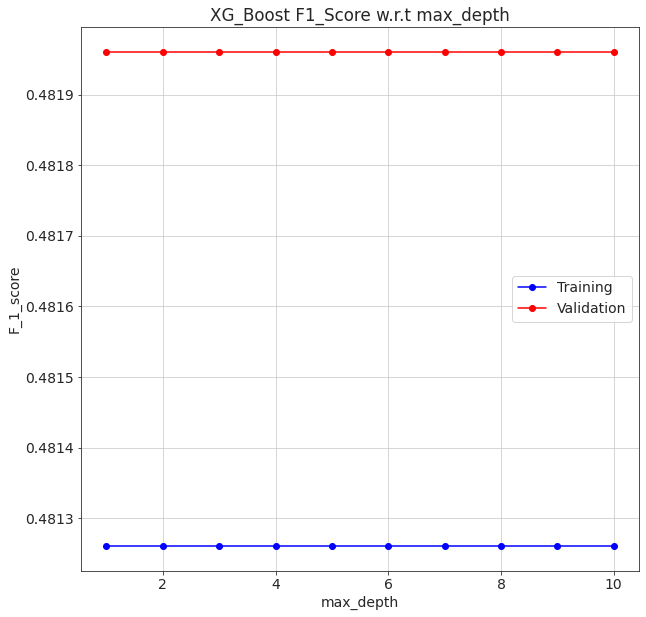

In [ ]:
%%time
XG_Boost_test_param_and_plot('max_depth',[1,2,3,4,5,6,7,8,9,10])

CPU times: user 23min 16s, sys: 2.05 s, total: 23min 18s
Wall time: 24min 5s


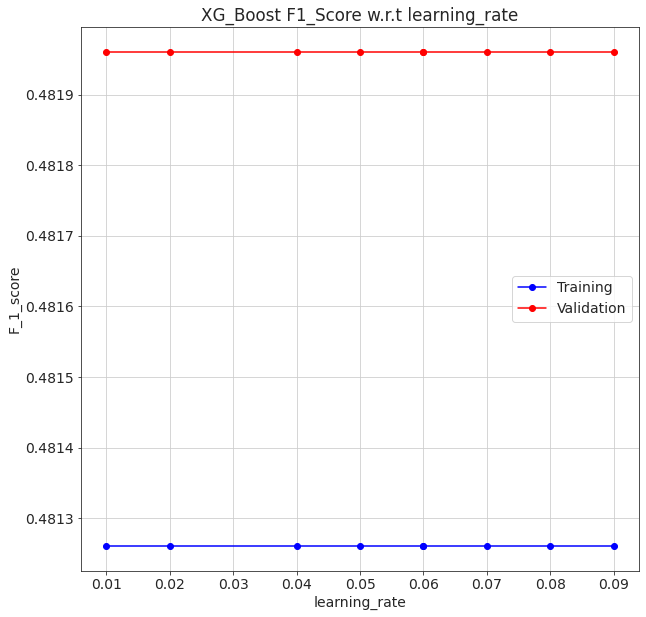

In [ ]:
%%time
XG_Boost_test_param_and_plot('learning_rate',[0.001,0.02,0.04,0.05,0.06,0.06,0.07,0.08,0.09])

In [ ]:
def XG_Boost_model_feature_importance(model,name=''):
    importance_df=pd.DataFrame({
        'Feature': train_inputs.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    # Plotting of the different features based on respective model
    plt.title('{} feature Importance'.format(name))
    plt.grid()
    sns.barplot(data=importance_df.head(15), x='Importance', y='Feature');
    return importance_df

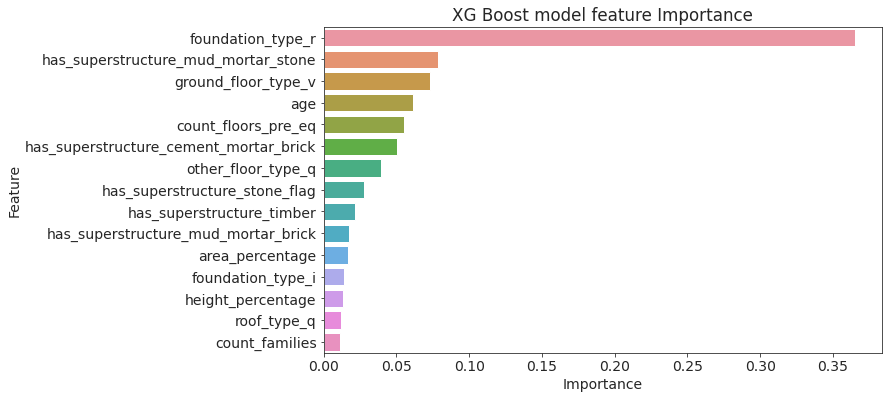

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgboost_model = GradientBoostingClassifier(random_state=42).fit(train_inputs, train_targets)
XG_Boost_model_feature_importance=XG_Boost_model_feature_importance(xgboost_model,'XG Boost model')

## Optimized model:
After carefully performning `hyperparameter` tunning spread across various ML algorithm and on, comparing the training and validation score .We can choose the best hyperparameter which gives best `F1` score. And that ML algorithm would be choosen as final model give prediction on the unseen dataset.

In [ ]:
max_depth=25
learning_rate=0.01
min_samples_leaf=2
n_estimators=45
min_samples_split=6

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(max_depth=25,
min_samples_leaf=2,
n_estimators=45,
min_samples_split=6)

In [ ]:
Rf.fit(train_inputs,train_targets)

RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=45)

In [29]:
df_test_values.drop(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], axis=1,inplace=True)

In [30]:
df_test_values.columns

Index(['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_off

In [33]:
#len(df.columns),len(df_test_values.columns)

(40, 35)

In [59]:
#df_test_values[input_cols].columns,len(train_inputs[input_cols].columns)

KeyError: ignored

In [63]:
final_prediction=Rf.predict(test_inputs)

array([2, 2, 2, ..., 2, 3, 2])

The output of the final_model, and working on unseen data can be get 

## Summary:
* On sequential following the steps, dataset has been downloaded and preprocessed by identifying the input and target columns 
* Actual problem of predicting `damage_grade` is of classification problem in Machine learning
* This problem has been solved by first making base-line model and then moving to the different version of the tree based model for better `F_1` score ( better precision and accuaracy) 
* All the hyperparameter tunned also demonstrated their working and importance in making ML model.
* Several of hyperparameter has been tuned to make model robust, in terms of giving correct predictio when exposed to unknow dataset 
* On comparing the `F_1` score of training and validation best hyperparameter has been choosen 
* Accumulating all the optimised hyperparameter and then made one best model, which appear to be `randomforest` classifier
* After final model has been choosen having necessary parameter, dataset which hasn't been seen before to model has been put and prediction has been made by the model. 

## Future work:
* Some of the other ML model, can be used for solving classification problem
* Performing the hyperparameter in best way to get optimised list of hyperparameter, so that maximum outcome from the model can be made
* As number of columns has been increased, which can lead to less `F1` score therefore dimension of the dataset can be reduced, to get best `F1` score 
* Several of dimensional reduction techniques line PCA can be performed on the dataset, for eliminating unncessary colums from the dataset.
* Apart from that, some of the algorithm like `Boruta` can be used which will only select the best columns (feature engineering) from the list of all columns, lead to improving the F1 score of model.
* For getting the best hyperparmeter `Optuna` can be followed, leading best optimised hyperparameter.
* More accurate performance of the model can be get when ML model will be exposed on several of the unseen data.

In [68]:
import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## References:
* https://nhess.copernicus.org/articles/19/873/2019/#:~:text=Despite%20the%20great%20loss%20of,million%20(USD%205.178%20billion).
* https://nhess.copernicus.org/articles/19/873/2019/#:~:text=Despite%20the%20great%20loss%20of,million%20(USD%205.178%20billion).

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
* https://escavel.in/scholar/simulationpacks
* https://www.drivendata.org/competitions/57/nepal-earthquake/submissions/
* https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830
